# Business Case :-    
## Explore football skills and cluster football players based on their attributes.


## [ 1 ] . Python Implementation :-

In [1]:
import numpy as np                      # import numpy for mathematically & Scientifically Calculation
import pandas as pd                     # import pandas for data reading and manipulating
import matplotlib.pyplot as plt         # for ploting 
import seaborn as sns                   # for visualization
%matplotlib inline

#import warnings for ignore feature warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
data = pd.read_csv("players_20.csv")

In [3]:
# to display all Columns
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## [ 2 ] . Domain Analysis :-

## [ 3 ] . Basic Checks :-

In [4]:
# To see last 5 records
data.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  overall  potential  \
18273    China PR               Beijing Renhe FC       48         56   
18274    China PR               Shanghai SIPG FC       48         56   
18275    China PR         Hebei China Fortune FC       48         56   
18276    China PR  Shanghai Greenland Shenhua FC       48         54   
18277    China PR         Hebei China Fortune FC       48         51   

       value_eur  wage_eur player_positions preferred_foot  \
18273      40000      2000               CB          Right   
18274      40000      2000               CB          Right   
18275      40000      1000               CM          Right   
18276      40000      1000               CM          Right   
18277      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

      body_type real_face  release_clause_eur player_tags team_position  \
18273    Normal        No             70000.0         NaN           RES   
18274    Normal        No             72000.0         NaN           SUB   
18275      Lean        No             70000.0         NaN           SUB   
18276      Lean        No             70000.0         NaN           SUB   
18277    Normal        No                 NaN         NaN           SUB   

       team_jersey_number      loaned_from      joined  contract_valid_until  \
18273                36.0              NaN  2018-07-13                2019.0   
18274                31.0              NaN  2019-02-01                2022.0   
18275                38.0              NaN  2019-01-01                2019.0   
18276                33.0              NaN  2019-02-01                2022.0   
18277                37.0  Tianjin TEDA FC         NaN                2019.0   

      nation_position  nation_jersey_number  pace  shooting  passing  \
18273             NaN                   NaN  57.0      23.0     28.0   
18274             NaN                   NaN  58.0      24.0     33.0   
18275             NaN                   NaN  54.0      35.0     44.0   
18276             NaN                   NaN  59.0      35.0     47.0   
18277             NaN                   NaN  60.0      32.0     51.0   

       dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
18273       33.0       47.0    51.0        NaN          NaN         NaN   
18274       35.0       48.0    48.0        NaN          NaN         NaN   
18275       45.0       48.0    51.0        NaN          NaN         NaN   
18276       47.0       45.0    52.0        NaN          NaN         NaN   
18277       45.0       47.0    55.0        NaN          NaN         NaN   

       gk_reflexes  gk_speed  gk_positioning player_trai

In [5]:
# To see about data frame & know about data type
#pd.set_option('display.max_rows',None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
# Statistical Information of Numerical columns
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

### Insights from Describe :-

- The Footbal Players Average age is 25.2 , height is 181.3 cm , weight is  75.2 kg .
- The Average Overal Performance rating of players is 66.2 out of 100. The Average Potential or feature growth of players is 71.5 .
- The Avg. market value of players in Rating is 2.48 million euros but Avg. wages is 9456.9 euros.
- Average International Reputation of players in rating is 1.1 out of 5 which shows Low international Profile .
- 2.9 is the Avg. rating of Players who use Their Weak foot for playing , 2.3 is avg. rating of Players Skill moves.
- Players avg. Pace / how move quickly with the ball is 67.7 , shooting is 52.2 , Passing is 57.2 , Dribbling is 62.53 , defending is 51.5 , physic is 64.87 rating out of 100.
- Average rating of gk_diving , gk_handling , gk_kicking , gk_reflexes , gk_positioning  are more than 60 but gk_speed is 37 out of 100 which indicating Low goal keeper's sppeed among all other attribute of goal keeper.
- The Avg. Rating of Attacking players for Crossing is 49.7 ,for finishing is 45.5 , heading accuracy is 52.2 ,short passing is 58 ,Volleys is 42.8 .
- Skills avg. rating for Dribbling is 55.5 , Curve 47.3 , free kick accuracy 42.7 , long pasing 52.7 , Ball Control is 58.4 out of 100 rating .

- Avg. movement rating for Acceleration , Sprint Speed , Agility , Reaction & Balance is more than 60 rating.
 - Avg. Power rating of players for Shot power is 58 , Jumping 64.9 , Stamina 62.8 , Strength 65 , Long Shots is 46.
 - The Avg. Mentality rating for agression is 55 , interception 46 , Positioning 50 , Vision 53, Penalities 48 , Composure is 58 .
 - Avg. rating of Defending for Marking , Standing Tackle , Sliding Tackle are less than 50.
 - Avg rating of goal keeping for diving  , handling , Kicking , Positioning and reflexes are less than 17 out of 100.

In [7]:
# Statistical information about Objective Features
data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

### Insights from Describe () :-

- Nationality shows that there are 162 nations and 698 Clubs .
- 13960 players prefered Right foot ,
- Most of the Players has work rate is medium/medium ,Normal body type , no real faces , most players has  Strength tag , SUB team position and National position & Early Crosser Traits.

### insights :-

- most of data columns are Null values morethan 50 .
- There are some rows have missing values.
- some features have not same data type

. we will fix above issues.

In [8]:
# Create a list of columns in which more than 50 % data is null / NaN 
null_columns = []
for i in data.columns:
    if (data[i].isnull().sum() / len(data)*100) > (50) :
        null_columns.append(i)
print('More than 50% null data Columns are : ','\n',null_columns)

More than 50% null data Columns are :  
 ['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits']


In [9]:
# Drop more than 50 % null data contained columns
data.drop(null_columns,axis=1,inplace=True)

In [10]:
# Drop unwanted columns
data.drop(['sofifa_id','player_url','long_name','team_jersey_number'],axis=1,inplace=True)

In [11]:
# We have much more observation , so we drop some null rows
data.dropna(inplace=True)

In [12]:
# create a function to Split the column values and add them which are in format ( 83 + 2)
def add_values(data, column_name):
    data[column_name] = data[column_name].apply(lambda x: sum(int(num) for num in x.split('+')))

In [13]:
# create a list of columns in which we perform addition after spliting
change_column = []
for i in (data.iloc[:,-26:]).columns :
    change_column.append(i)

In [14]:
# perform addition using the function we created.
for i in change_column:
    add_values(data,i)

In [15]:
# Change data type of date columns
data['dob'] = pd.to_datetime(data['dob'])
data['joined'] = pd.to_datetime(data['joined'])
#data['contract_valid_until'] = pd.to_datetime(data['contract_valid_until'], format='%Y')

## [ 4 ] . Exploratory Data Analysis :-

In [16]:
# separate Categorical and Numerical columns
cat_columns = []                                        # create a categorical empty list
num_columns = []                                        # create a Numerical empty list
for i in data.keys() :                                  # use a for loop to iterate over the data set
    if data[i].dtype == 'O' :                           # give condition for Objective Data Type
        cat_columns.append(i)                           # append objective columns
    else :
        num_columns.append(i)                            # append Non-objective columns
        
print('Categorical Columns : \n',cat_columns,'\n')

print("Numerical Columns : \n",num_columns)

Categorical Columns : 
 ['short_name', 'nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'team_position'] 

Numerical Columns : 
 ['age', 'dob', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'menta

In [17]:
num_data = data[num_columns]   # Create a data Frame of Numerical features
cat_data = data[cat_columns]   # Create a data Frame of Categorical features

## EDA for Numerical Columns :-

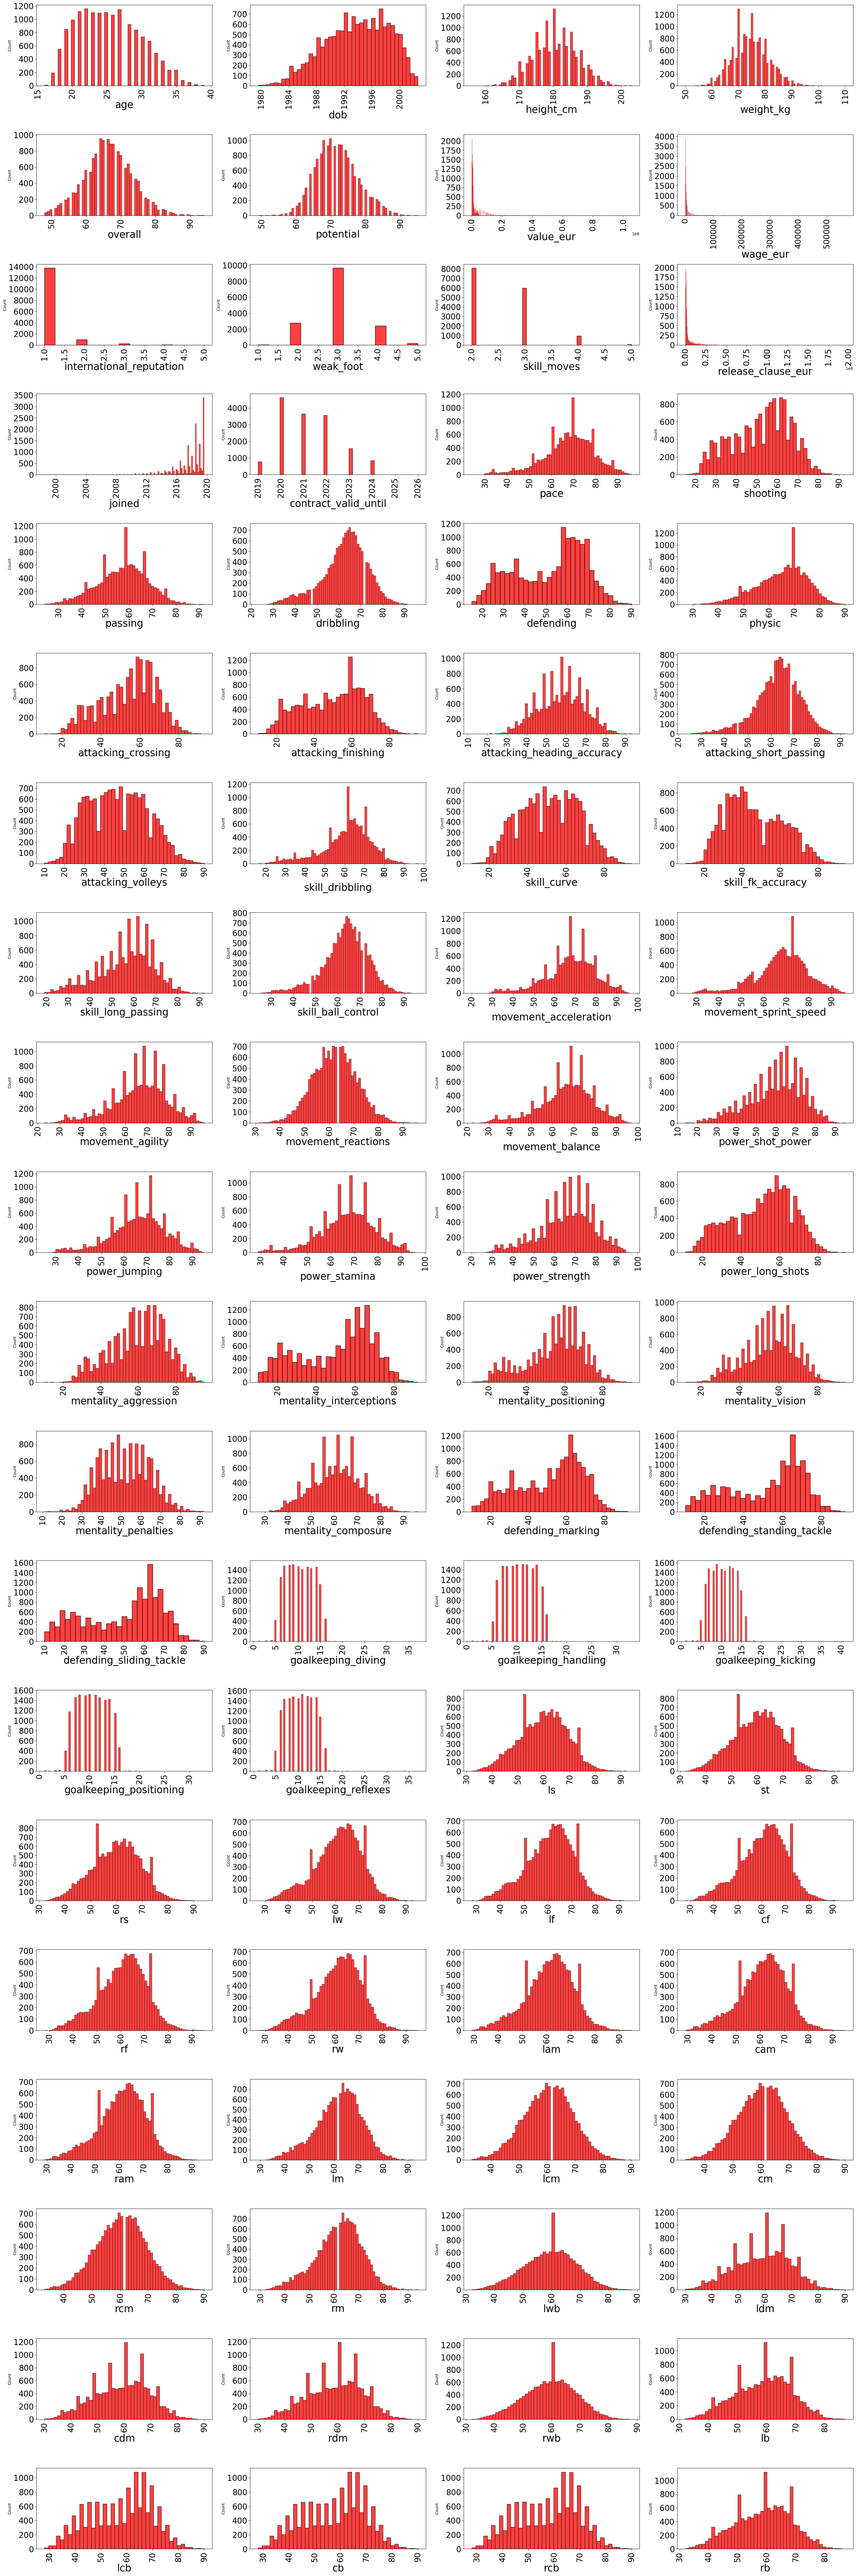

In [18]:
## Univariate Analysis of first 40 Numerical features

plt.figure(figsize=(30,90))               # Set Canvas size
plotnumber = 1                            # Create a variable
for i in num_data.keys():               # use for loop to iterate Numerical Variable
    plt.subplot(20,4,plotnumber)          # set number of rows & columns according to No.of Variable
    sns.histplot(x=data[i],color='r')               # plot Histogram
    plt.xticks(rotation=90,fontsize=20)
    plt.xlabel(i,fontsize=25)
    plt.yticks(fontsize=20)
    plotnumber = plotnumber + 1
plt.tight_layout()                        # to avoid overlapping of plots

## Insights from Numerical Analysis :-

- Most of the Players age Ranging between 19 to 30, Height Ranges between 175 cm to 188 cm , Weight ranges between 70 to 80 kg.
- most foot ball player birth between year 1988 to 2000 , most players joined after 2016 and most players contract valid till 2023.
- Most of the players performance rating ranges for Overal is 60 to 75 , Potential is 65 to 75 .
- International rating is 1 star , weak foot use rate is 3 star , Skills for moving rating is 2 to 3 star ,

[]

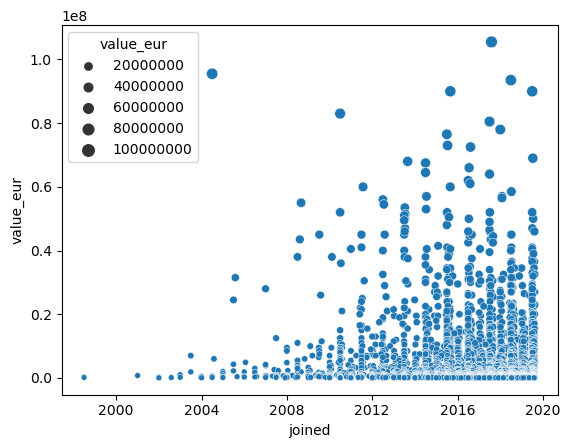

In [19]:
sns.scatterplot(x=data.joined,y=data.value_eur,size=data.value_eur)
plt.plot()

### Insights :-

- whose joined after the year 2004 that player's Value is increased.

## EDA for Categorical Features:-

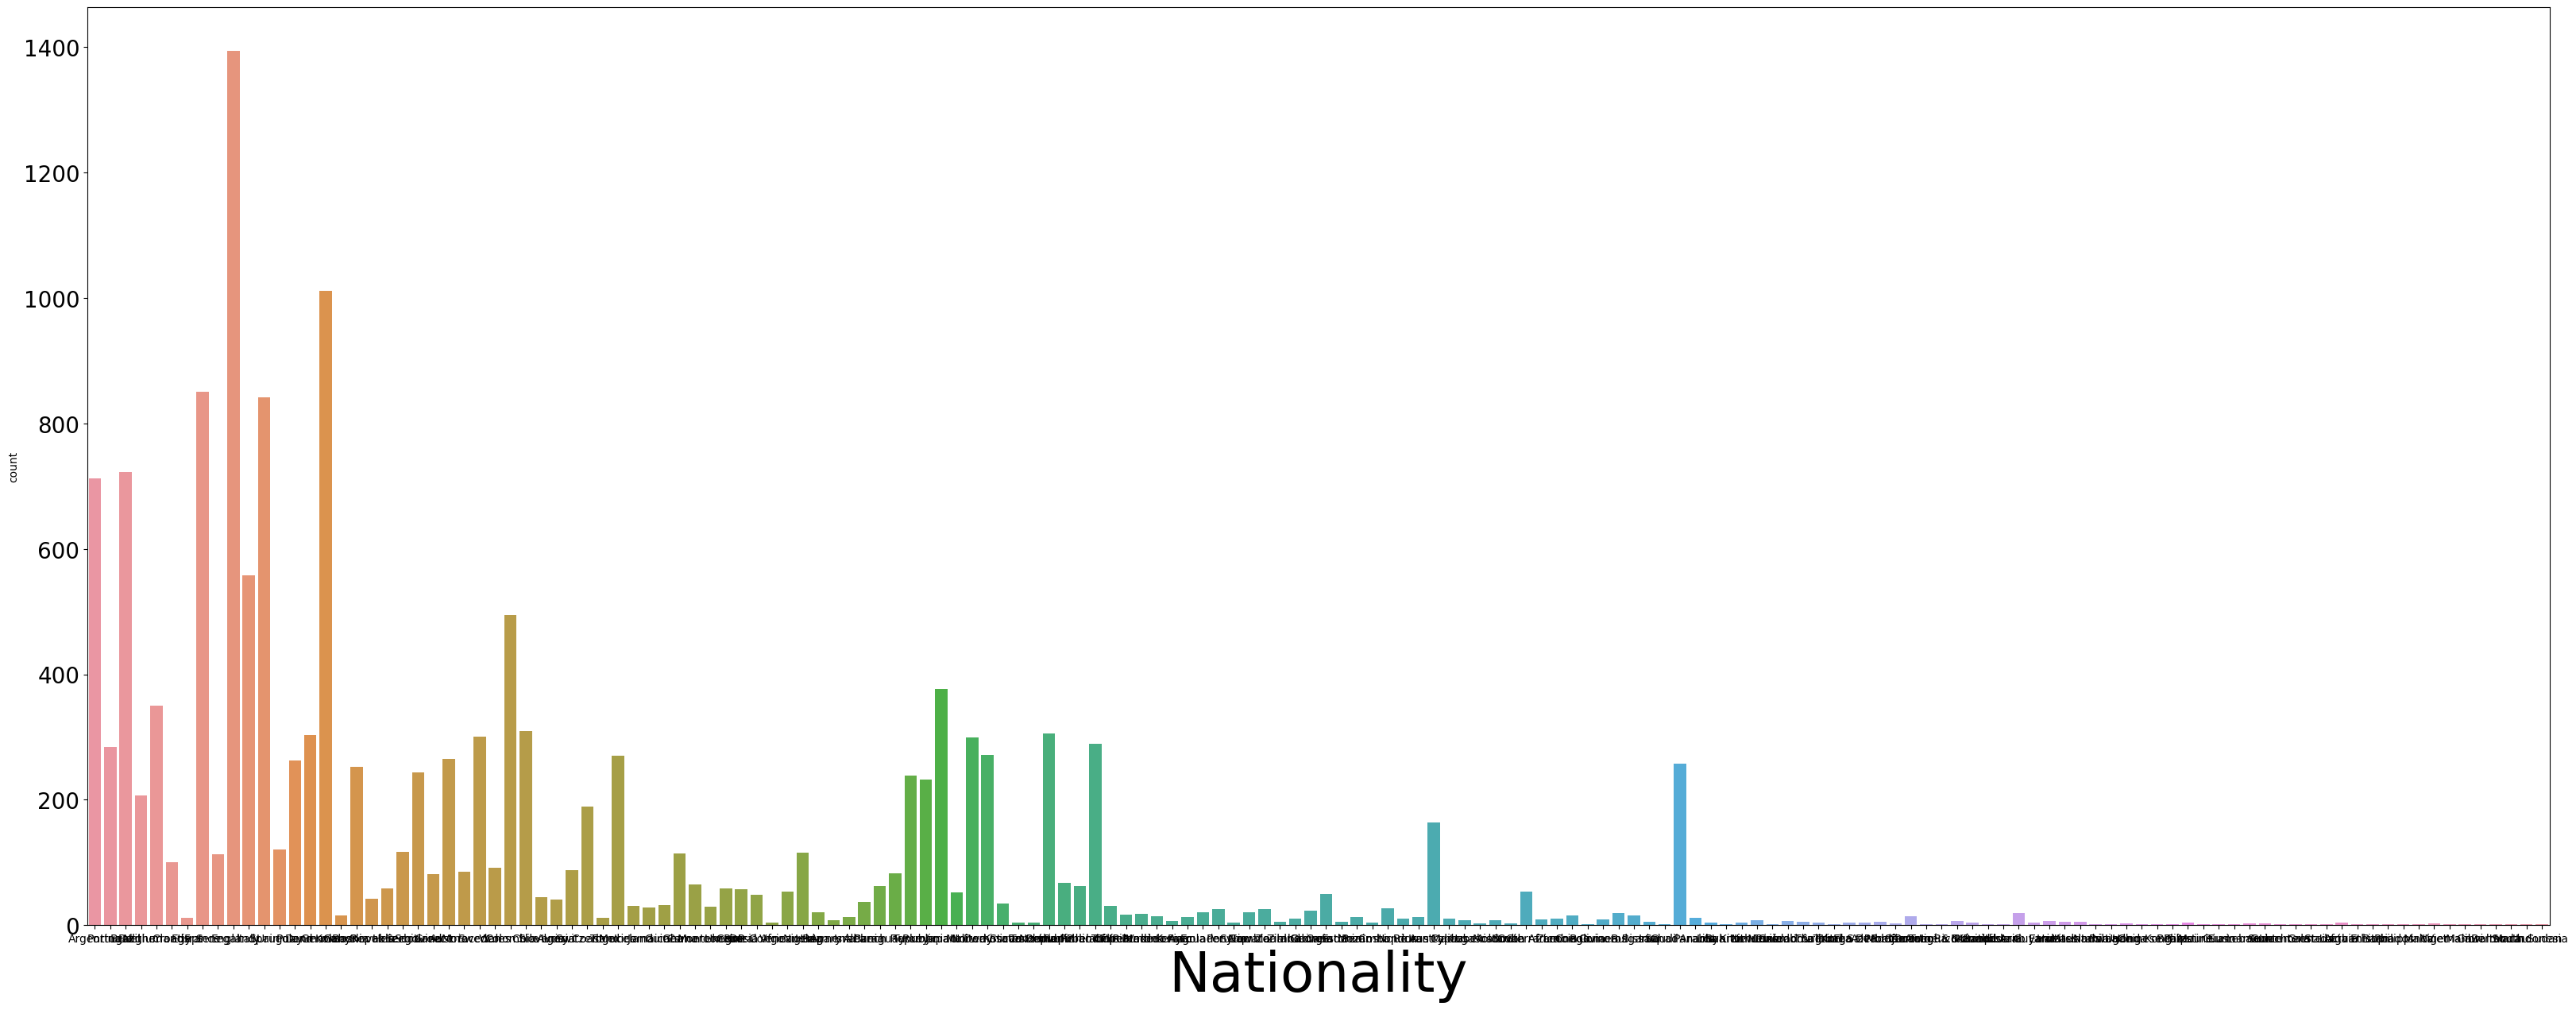

In [20]:
# Plot for no.of Football Players  according to Nationality
plt.figure(figsize=(40,15))               
sns.countplot(x=data.nationality)
plt.xlabel("Nationality",fontsize=50)
plt.yticks(fontsize=20)
plt.show()

### Insights :-
- The football no. of player's of six country have more than 600.

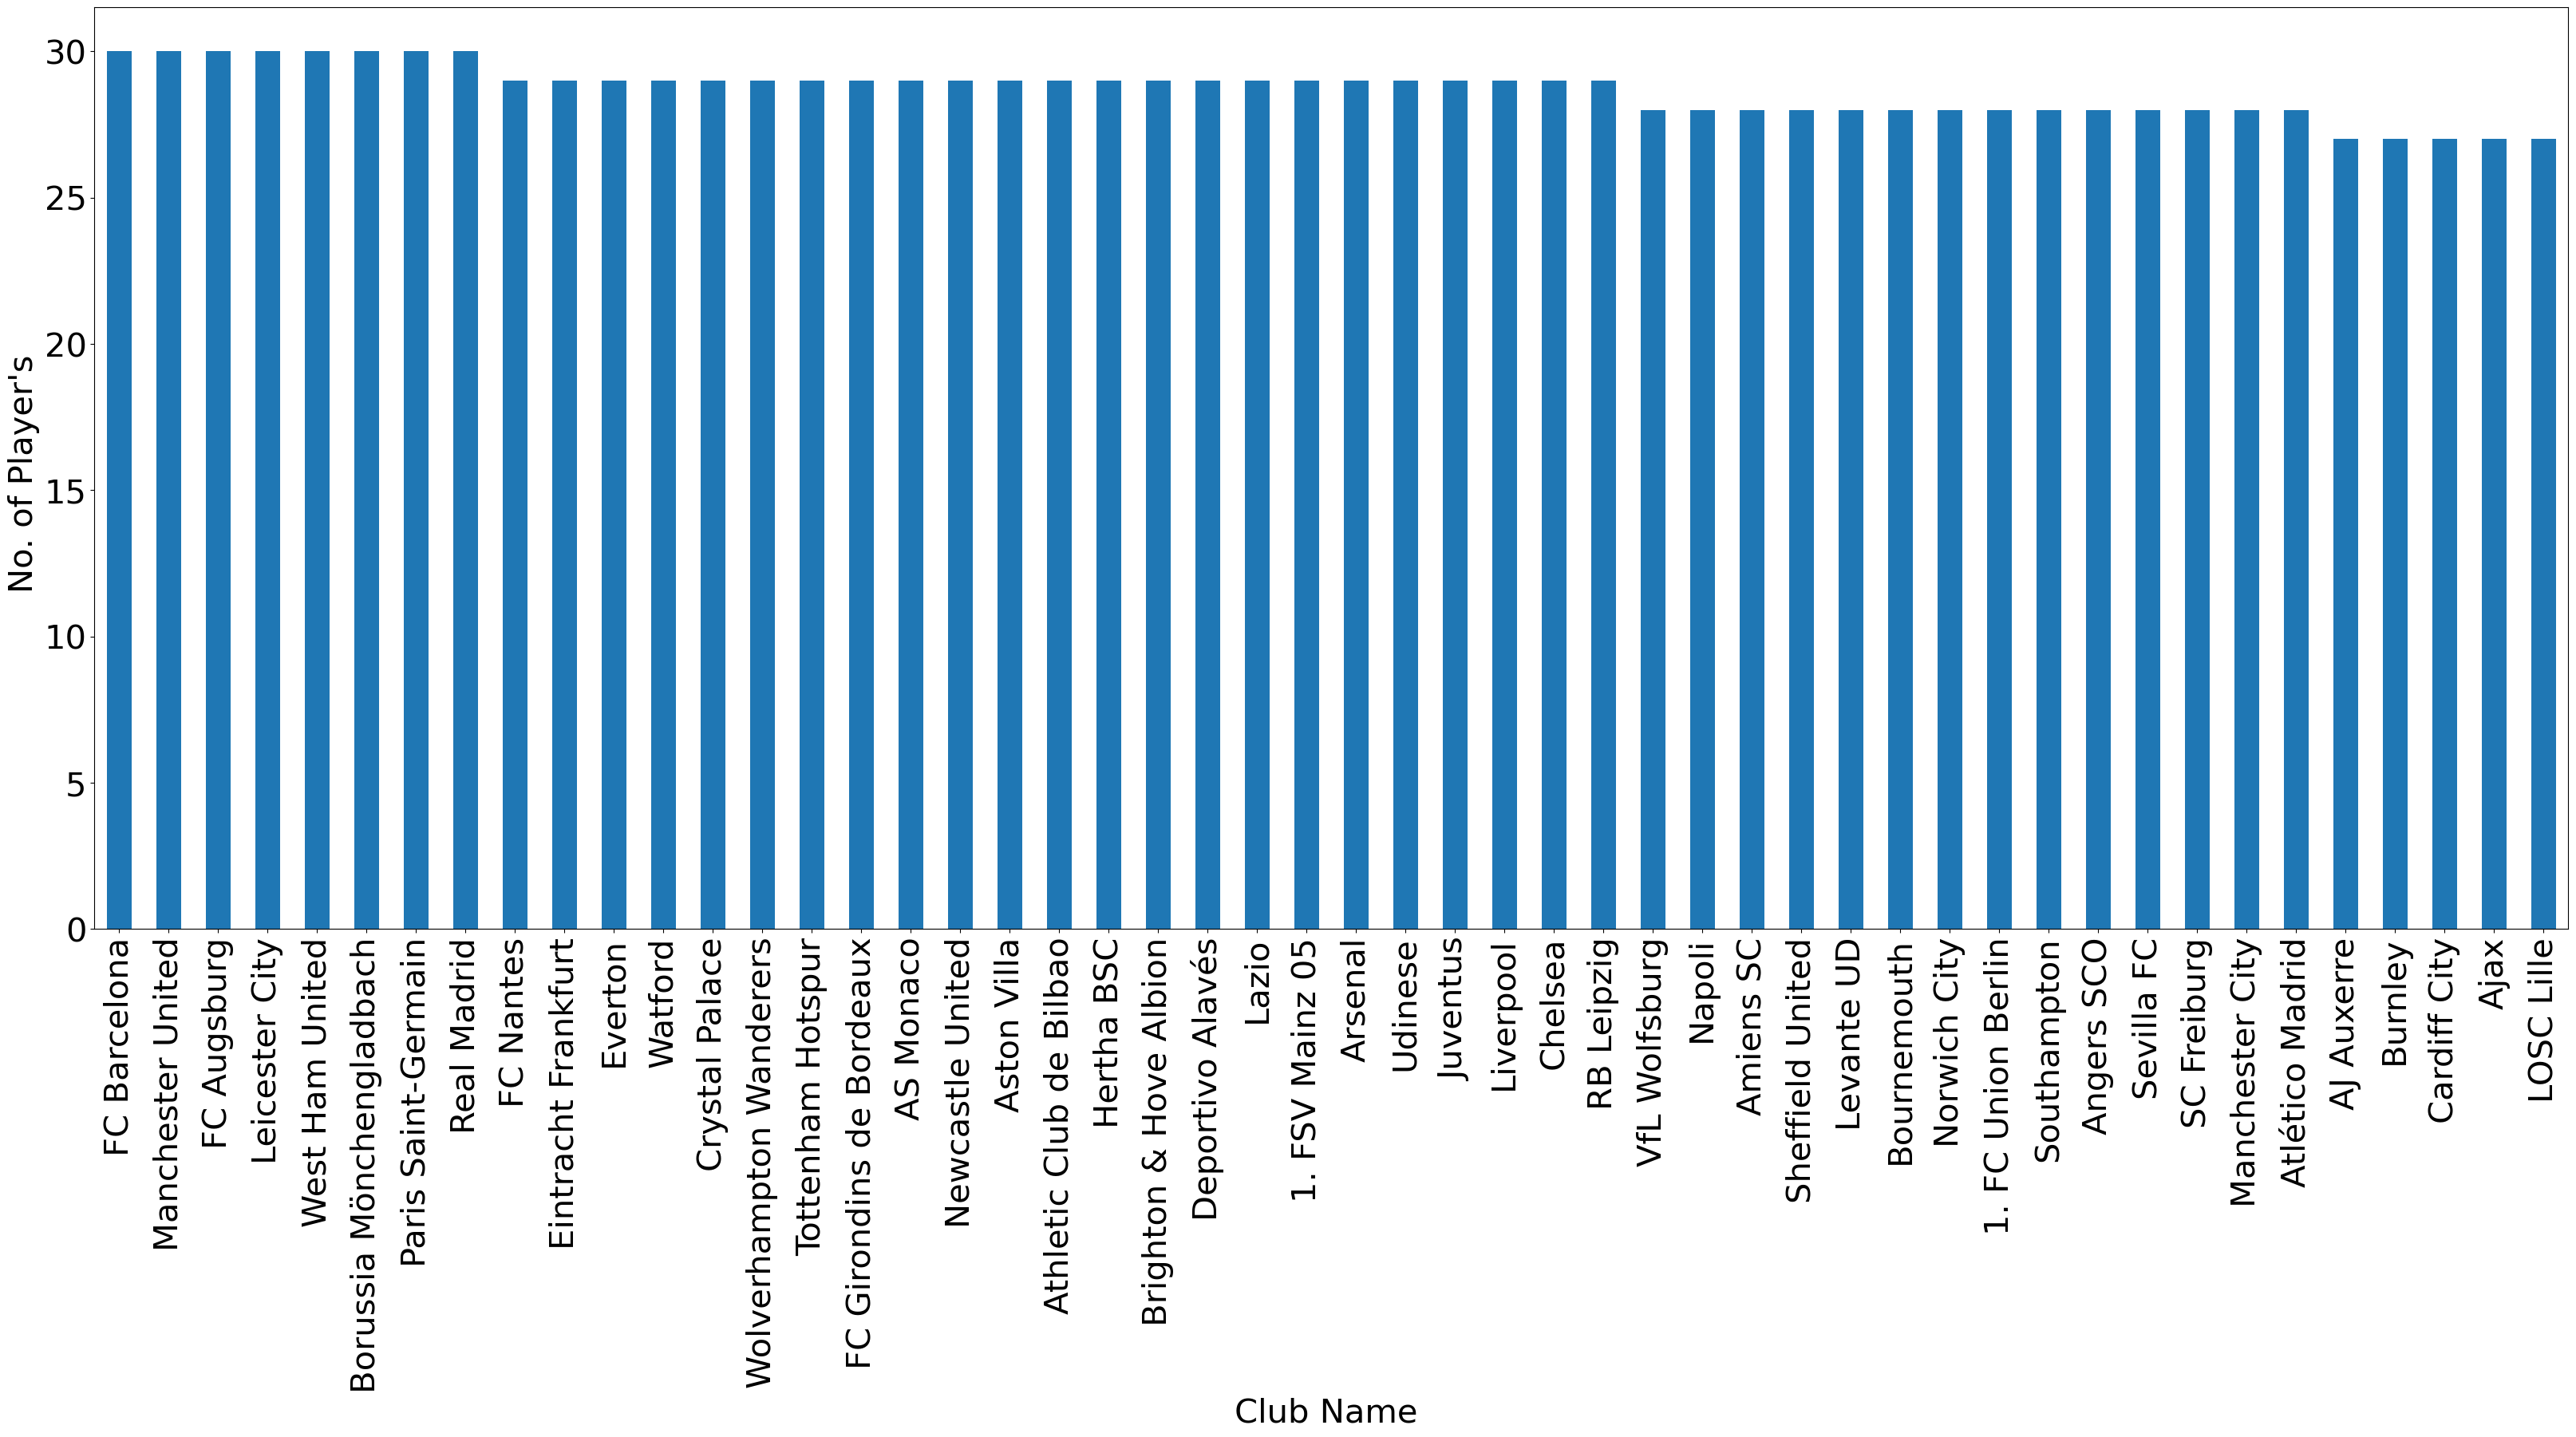

In [21]:
# Plot for Top 50 Football Club according to no.of Players
plt.figure(figsize=(40,15))               
data.club.value_counts()[:50].plot(kind='bar',fontsize=30)
plt.xlabel("Club Name ",fontsize=30)
plt.ylabel("No. of Player's ",fontsize=30)
plt.show()

### Insights from Club :-

- It is Clearly seen that top 50 football club has no. of players  are 26 to 30 .

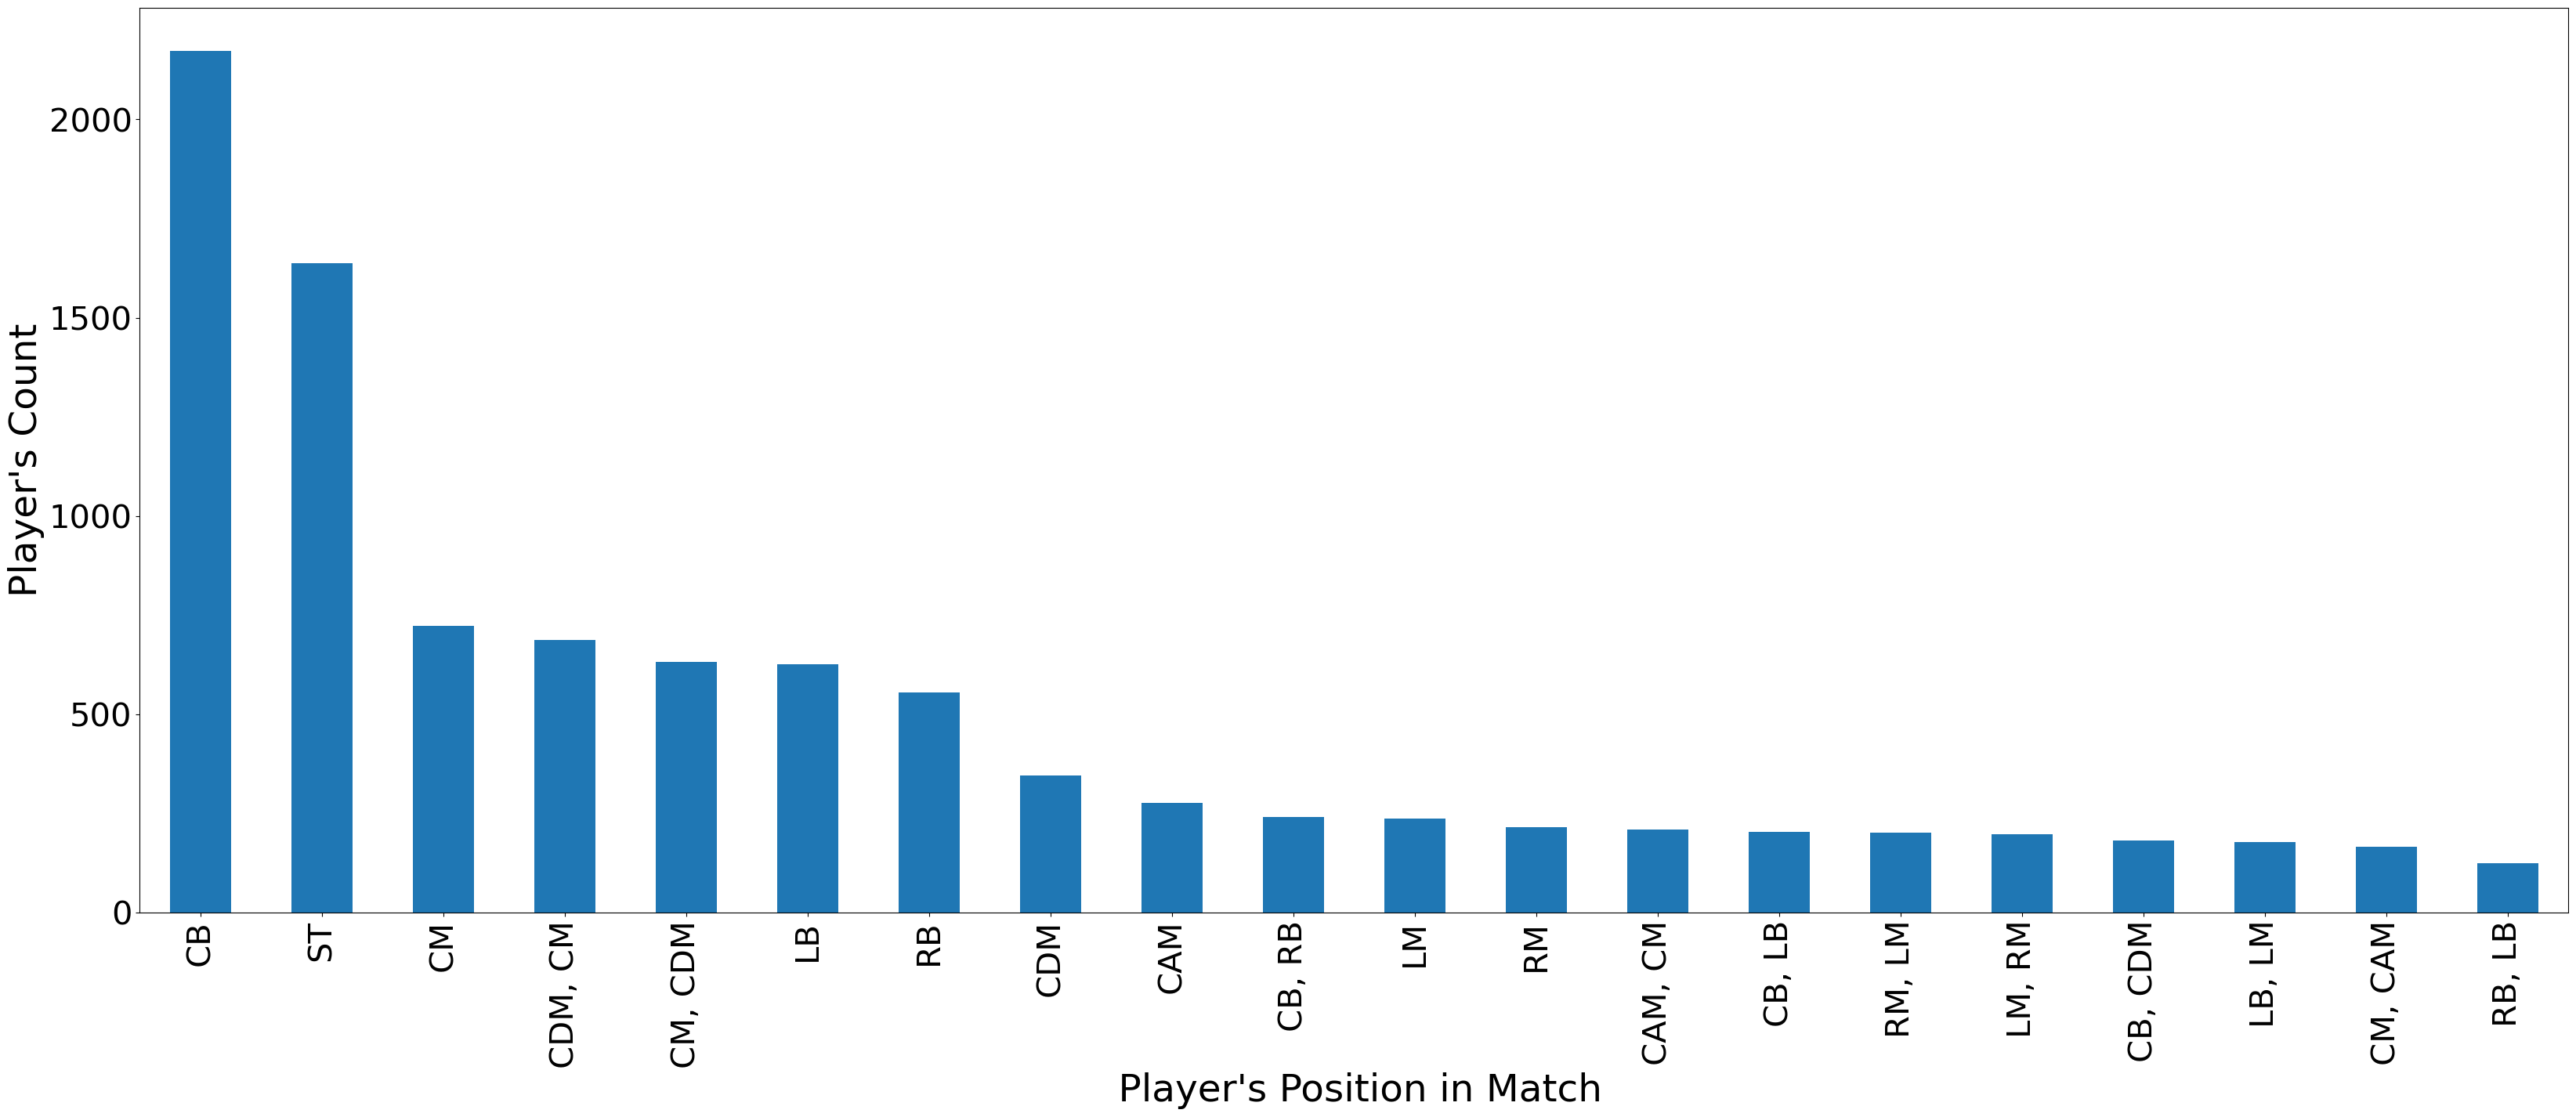

In [22]:
# Plot for Top 50 Football Player's position according to no.of Players
plt.figure(figsize=(40,15))               
data['player_positions'].value_counts()[:20].plot(kind='bar',fontsize=30)
plt.xlabel(" Player's Position in Match",fontsize=35)
plt.ylabel("Player's Count",fontsize=35)
plt.show()

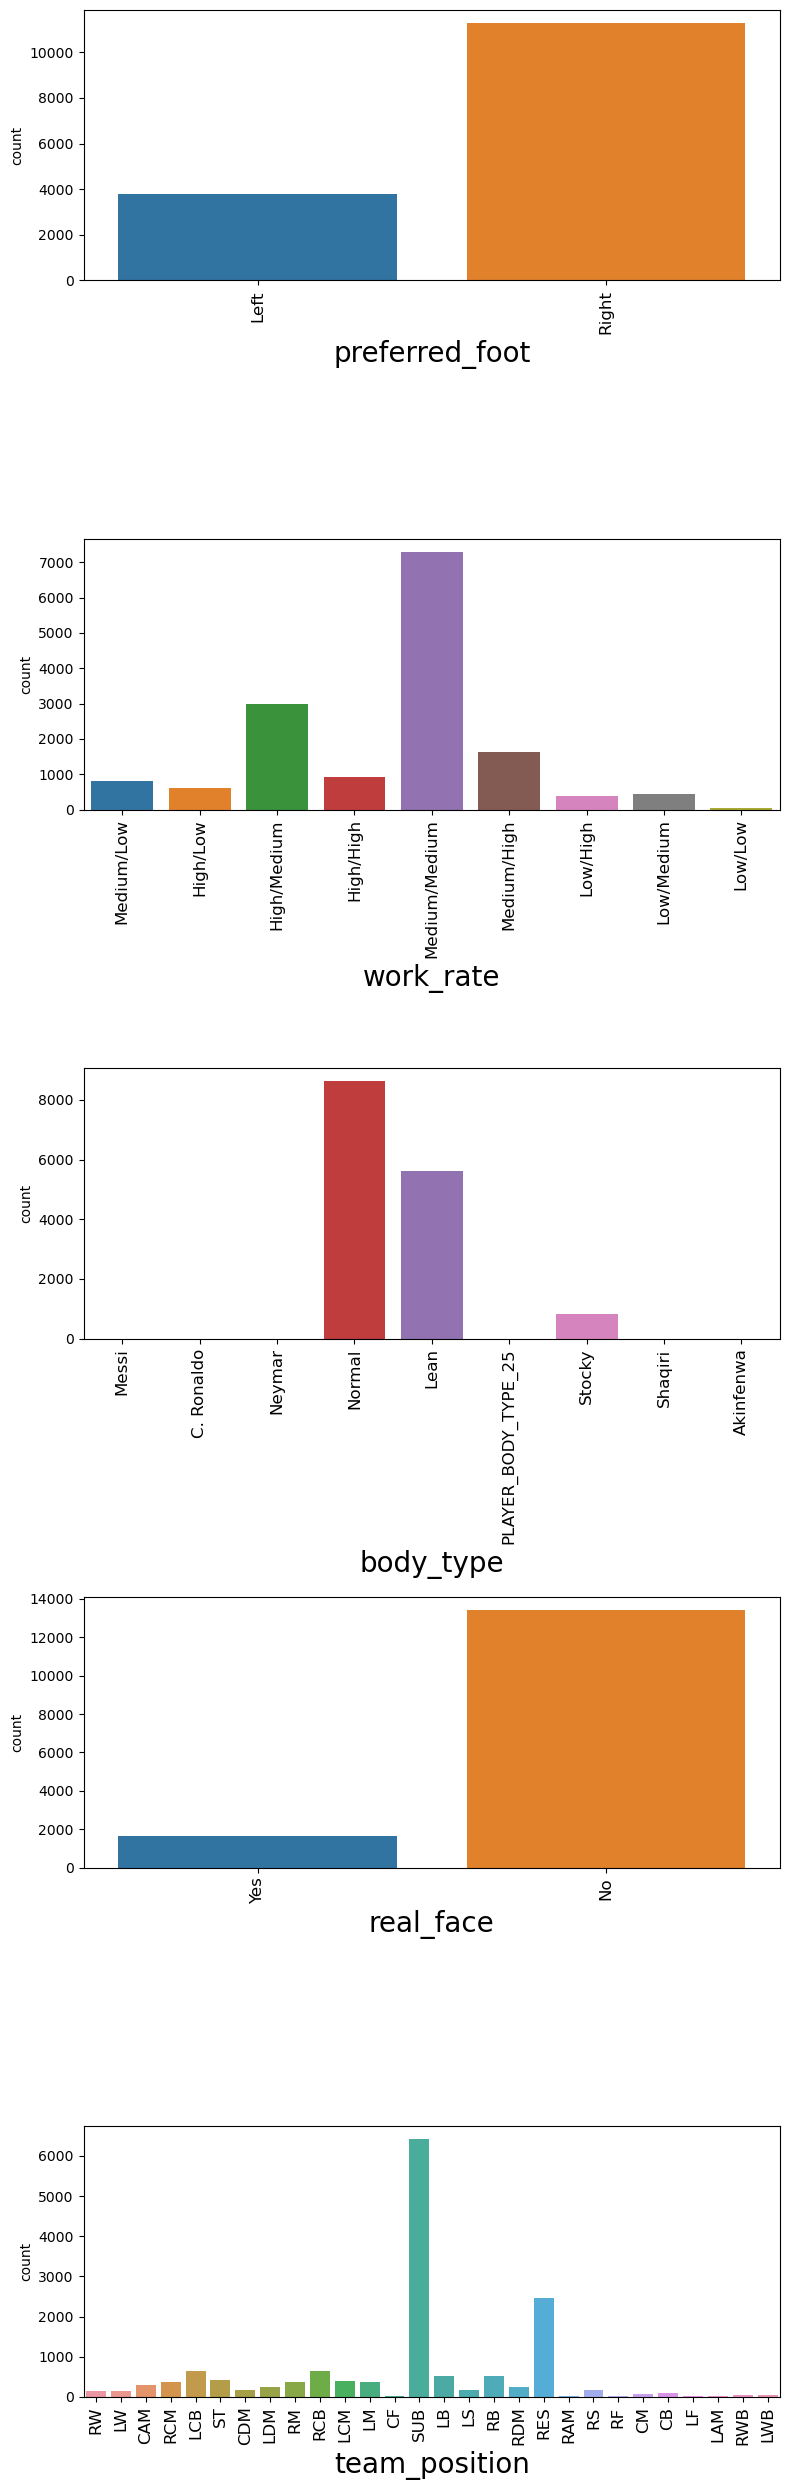

In [23]:
## Univariate Analysis of Categorical Data

plt.figure(figsize=(8,25))               # Set Canvas size
plotnumber = 1                            # Create a variable
for i in cat_data.drop(['short_name','nationality','club','player_positions'],axis=1): 
    plt.subplot(5,1,plotnumber)          # set number of rows & columns according to No.of Variable
    sns.countplot(x=data[i])             # plot Countplot
    plt.xticks(rotation=90,fontsize=12)  # set xticks size
    plt.xlabel(i,fontsize=20)            # set xlabel and size
    plotnumber = plotnumber + 1
plt.tight_layout()                        # to avoid overlapping of plots

## Insights from Categorical Analysis :-

- Most of the players prefered Right foot , Medium/Medium Work rate .
- Normal & Lean Body type , No real face , team position is SUB & RES .


# TASK - 3 :-

## ①  : Prepare a rank ordered list of top 10 countries with most players :-

In [24]:
# Top 10 nationality's according to no. of players
data['nationality'].value_counts()[:10]

England        1394
Germany        1011
France          850
Spain           842
Brazil          722
Argentina       712
Italy           558
Colombia        494
Japan           377
Netherlands     350
Name: nationality, dtype: int64

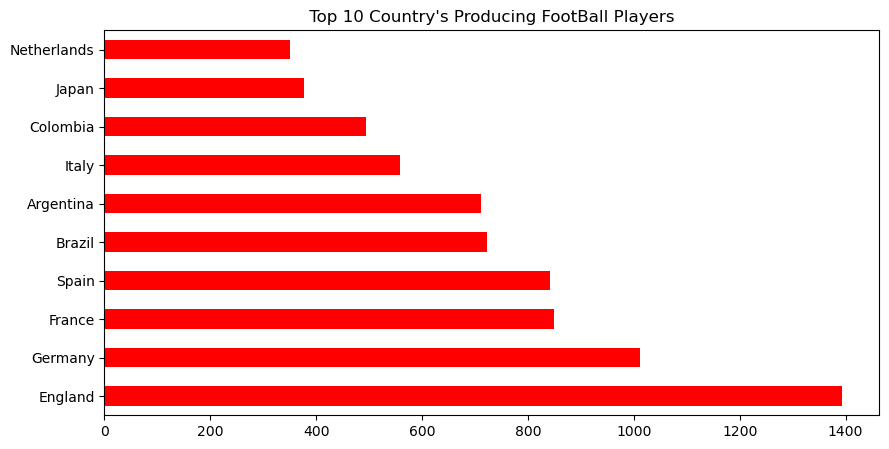

In [25]:
# Plot a Graph showing Top 10 Country producing No. of Players
plt.figure(figsize=(10,5))                                     # set Canvas size
data['nationality'].value_counts()[:10].plot(kind='barh',color='r')      # top 10 nations plot with kind = barh
plt.title(" Top 10 Country's Producing FootBall Players ")
plt.show()

### Insights :-
   - **England** producing the most footballers that play at this level.

## ② : Plot the distribution of overall rating vs. age of players :-

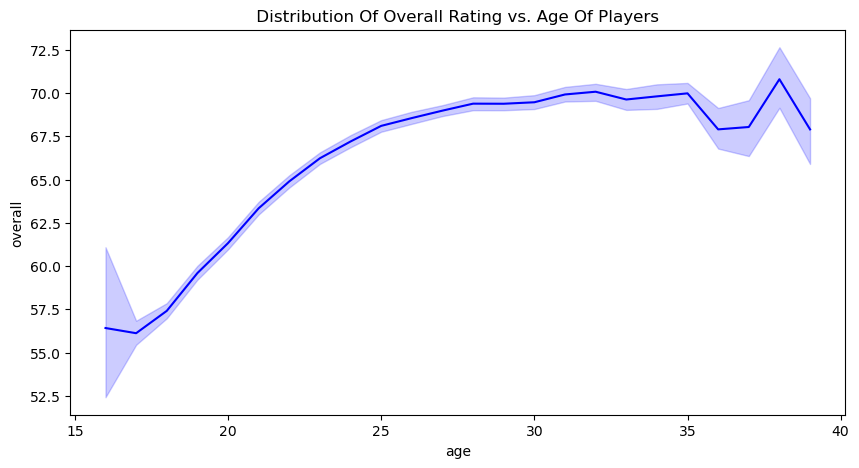

In [26]:
plt.figure(figsize=(10,5))
plt.title(' Distribution Of Overall Rating vs. Age Of Players ')
sns.lineplot(x='age',y='overall',data=data,color='b')
plt.show()

### Insights:-
   - **After the age of 35 year** , the players Overal Rating got Decreased so that The Player **stop Improving**.

## ③ : Which type of offensive players tends to get paid the most :- 

[]

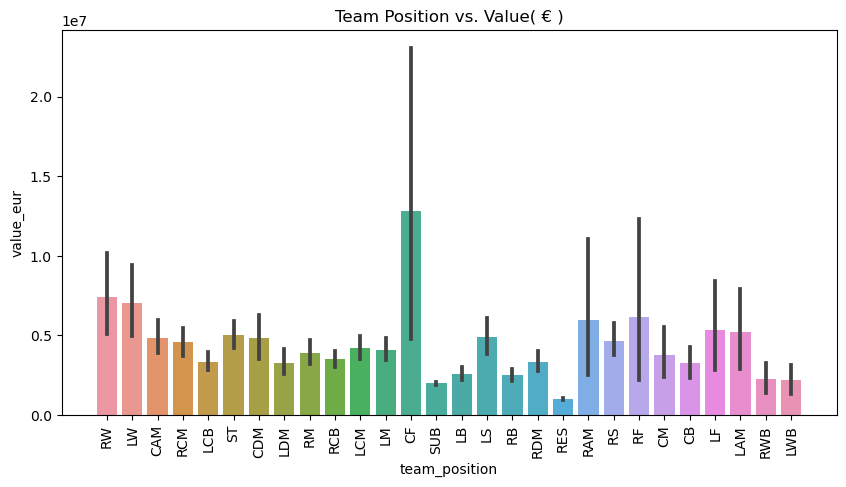

In [27]:
plt.figure(figsize=(10,5))                                 # set Canvas size
plt.title("Team Position vs. Value( € )")                  # set tha title of plot
sns.barplot(x='team_position',y='value_eur',data=data)     # Plot a barplot between team position and value euro
plt.xticks(rotation=90)
plt.plot()

### Insights :-
   - The **Centre Forward** ( CF ) position player get more paid 2.20 Million euro .
   - The Right-winger get paid more than Left-winger , left winger get paid more than Striker .

## ④	Historical comparison between Messi and Ronaldo :-

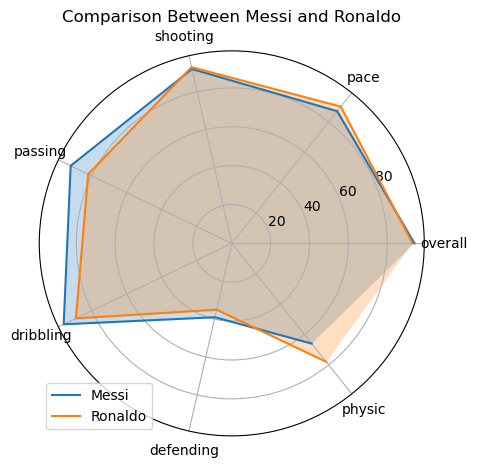

In [28]:
# Filter rows for Messi and Ronaldo
messi = data[data['short_name'] == 'L. Messi']
ronaldo = data[data['short_name'] == 'Cristiano Ronaldo']

# Define the skill attributes for comparison
attributes = ['overall','pace','shooting', 'passing', 'dribbling', 'defending','physic']

# Get attribute values for Messi and Ronaldo
messi_values = messi[attributes].values[0]
ronaldo_values = ronaldo[attributes].values[0]

# Create a radar chart
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(polar=True))
# Calculate angle for each attribute
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
# Add the attribute labels
ax.set_xticks(angles)
ax.set_xticklabels(attributes)

# Plot Messi's skill values
ax.plot(angles, messi_values, label='Messi')
ax.fill(angles, messi_values, alpha=0.25)

# Plot Ronaldo's skill values
ax.plot(angles, ronaldo_values, label='Ronaldo')
ax.fill(angles, ronaldo_values, alpha=0.25)

# Add a legend and title
ax.legend()
plt.title('Comparison Between Messi and Ronaldo')

# Show the radar chart
plt.show()


### Insights :-

- The overall & Shooting Skill of Messi and ronaldo are Same .
- In Passing , Dribbling and Defending skill Messi is better than Ronaldo .
- But in Pace and Physic Skill Ronaldo is Better than Messi.

##  ⑤ Overall attribute vs. Potential attribute  :-

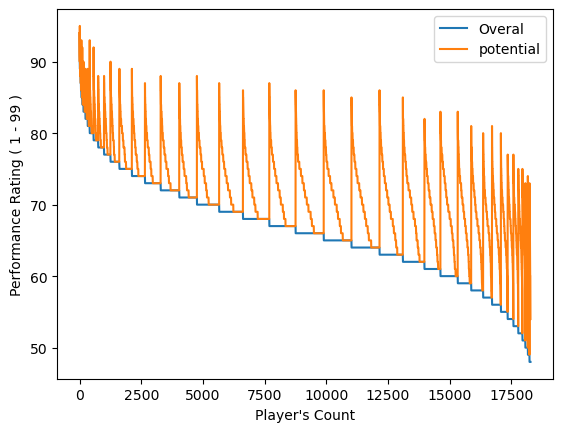

In [29]:
sns.lineplot(data.overall,label='Overal')
sns.lineplot(data.potential,label='potential')
plt.xlabel("Player's Count")
plt.ylabel("Performance Rating ( 1 - 99 )")
plt.show()

### Insights :-
- when players number increased their Overal rating decreased. 
- But the player whose overall is more than 70 their potential for future growth is also more than 90 in rating.

# [ 5 ] .  Data Preprocessing  for Clustering :-

## Create a Data Frame of Playe's Skill and Cluster them :

In [30]:
# list of Skills
df = ['age','height_cm','weight_kg','pace' , 'shooting' , 'passing' ,'dribbling','defending','physic','attacking_crossing',
         'attacking_finishing','attacking_heading_accuracy' , 'attacking_short_passing' ,'attacking_volleys','skill_dribbling',
         'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
         'movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
         'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
         'mentality_vision','mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
         'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
         'goalkeeping_reflexes']

In [31]:
# Create a data Frame of Skill's
df = data[df]

In [32]:
# Top five rows of skill data set
df.head()

age  height_cm  weight_kg  pace  shooting  passing  dribbling  defending  \
0   32        170         72  87.0      92.0     92.0       96.0       39.0   
1   34        187         83  90.0      93.0     82.0       89.0       35.0   
2   27        175         68  91.0      85.0     87.0       95.0       32.0   
4   28        175         74  91.0      83.0     86.0       94.0       35.0   
5   28        181         70  76.0      86.0     92.0       86.0       61.0   

   physic  attacking_crossing  attacking_finishing  \
0    66.0                  88                   95   
1    78.0                  84                   94   
2    58.0                  87                   87   
4    66.0                  81                   84   
5    78.0                  93                   82   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
4                          61                       89                 83   
5                          55                       92                 82   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
4               95           83                 79                  83   
5               86           85                 83                  91   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
4                  94                     94                     88   
5                  91                     77                     76   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   
2                96                  92                84                80   
4                95                  90                94                82   
5                78                  91                76                91   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   
2             61             81              49                84   
4             56             84              63                80   
5             63             89              74                90   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   
2                    51                       36                     87   
4                    54                       41                     87   
5                    76                       61                     88   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   
2                90                   90                   94   
4                89                   88                   91   
5                94                   79                   91   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37            

## i . Null Values :-

In [33]:
data.isnull().sum()
# Here is no missing values present , because we dropped all missing values

short_name    0
age           0
dob           0
height_cm     0
weight_kg     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 89, dtype: int64

## ii . Convert Categorical data into Numerical :-

In [34]:
# import Label Encoder from sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['nationality'] = lc.fit_transform(data['nationality'])

In [35]:
# Check that data is converted or not
df.head(2)

age  height_cm  weight_kg  pace  shooting  passing  dribbling  defending  \
0   32        170         72  87.0      92.0     92.0       96.0       39.0   
1   34        187         83  90.0      93.0     82.0       89.0       35.0   

   physic  attacking_crossing  attacking_finishing  \
0    66.0                  88                   95   
1    78.0                  84                   94   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   
1                 28                         32                        24   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes  nationality  
0                       14                     8            5  
1                       14                    11          119

## iii . Handle Outlier of contineous variable :-

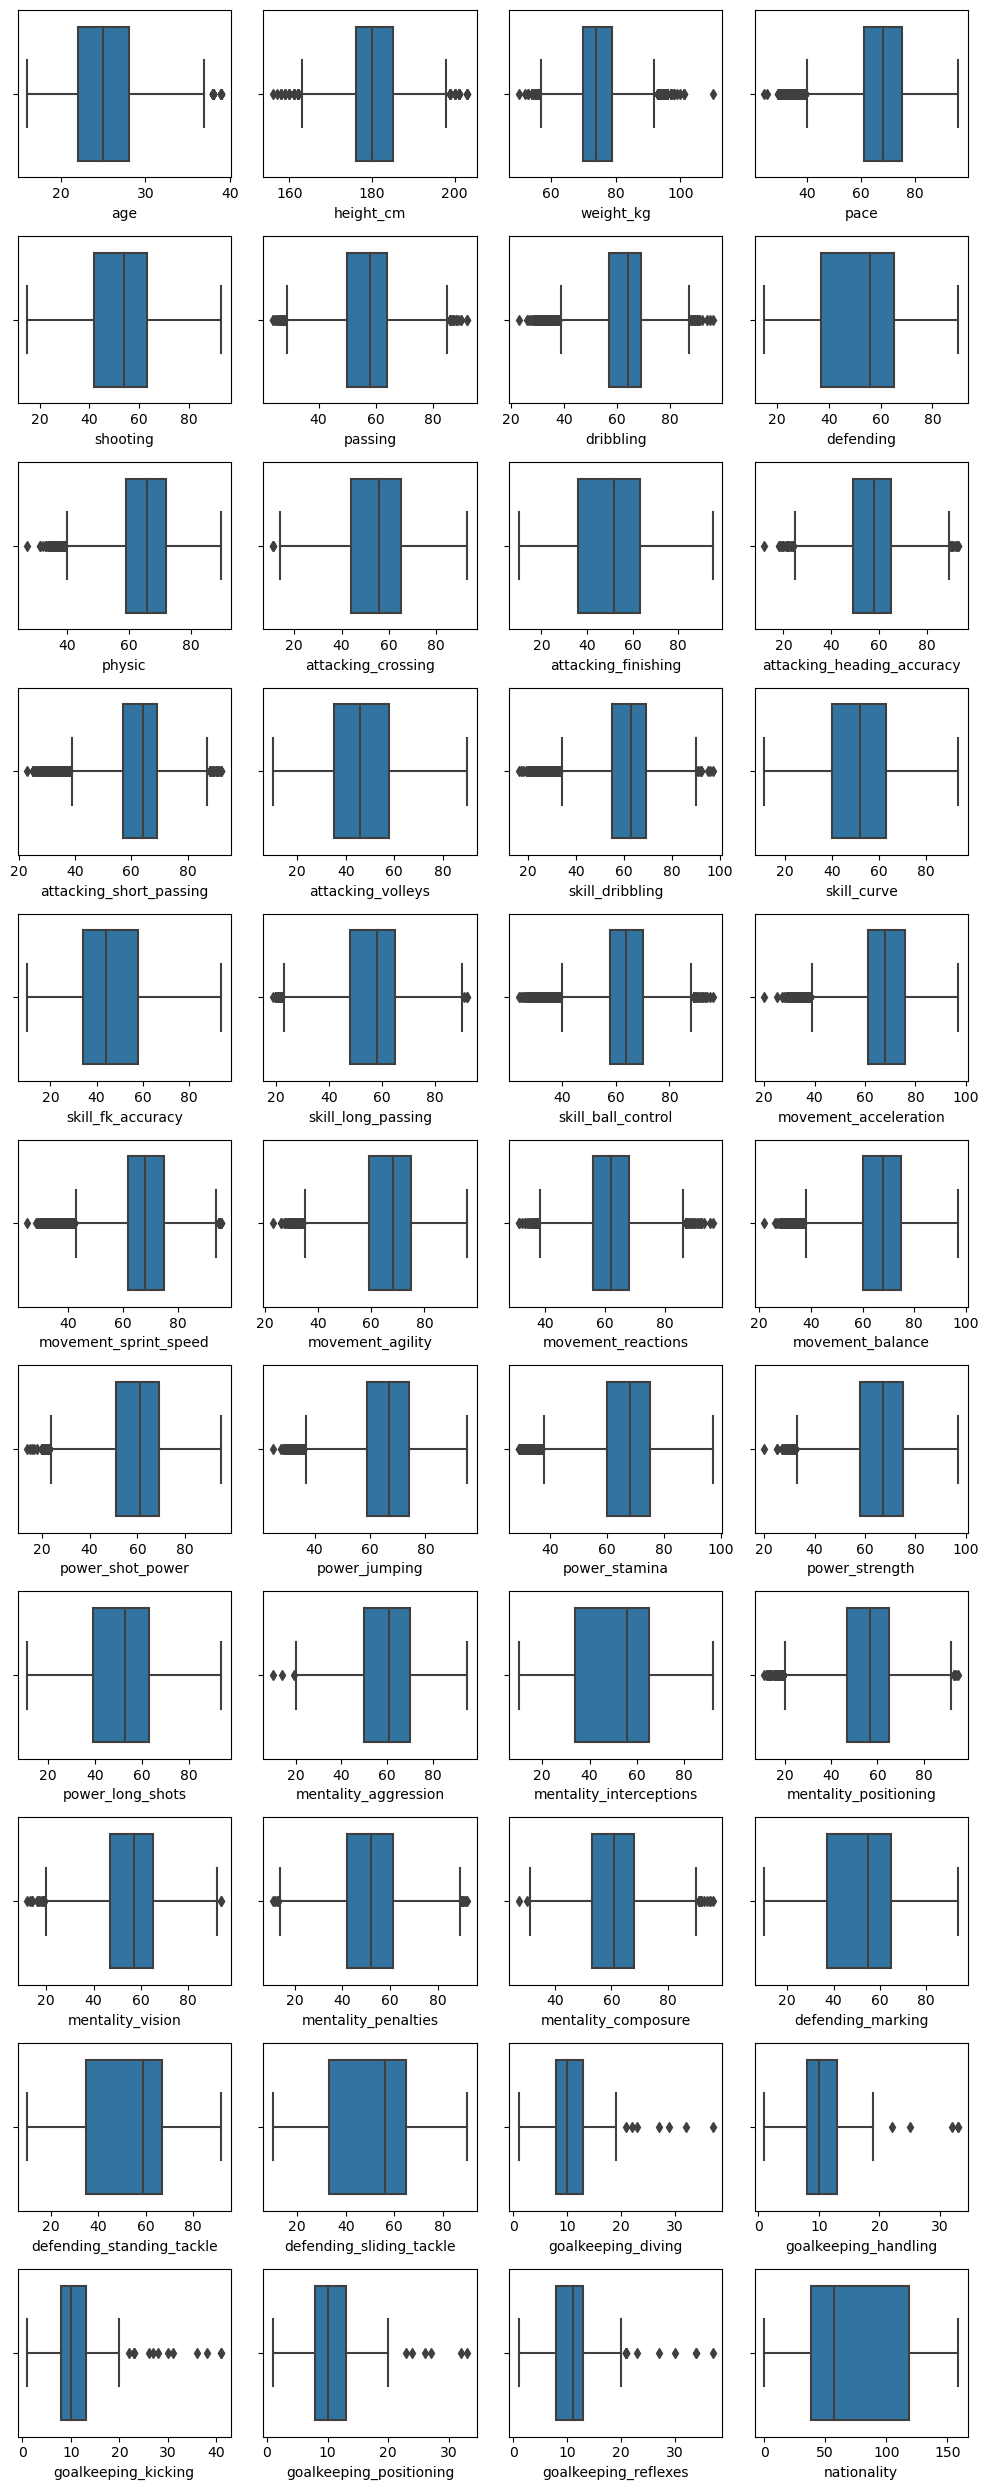

In [36]:
# plot Box plot to see the outliers
plt.figure(figsize=(10,25))               # canvas size
plotnumber = 1
for i in df.keys():                       
    plt.subplot(11,4,plotnumber)          # 11 rows, 4 columns
    sns.boxplot(x=df[i])                  # Box plot
    plotnumber = plotnumber + 1
plt.tight_layout()

In [37]:
# use a foor loop to check the outlier and handle them according to Median
for i in df:
    Q1 = np.quantile(df[i],0.25,method='midpoint')                   # first Quartile
    Q3 = np.quantile(df[i],0.75,method='midpoint')                   # Second Quartile
    IQR = Q3 - Q1                                                    # Set Inter Quartile Range
    l_limit = Q1 - (1.5 * IQR)                                       # Define Lower Limit/Bound
    u_limit = Q3 + (1.5 * IQR)                                       # Define Upper Limit / Bound
    
    # Change Outlier's with median
    df.loc[(df[i]<l_limit) | (df[i]>u_limit),i] = df[i].median()      

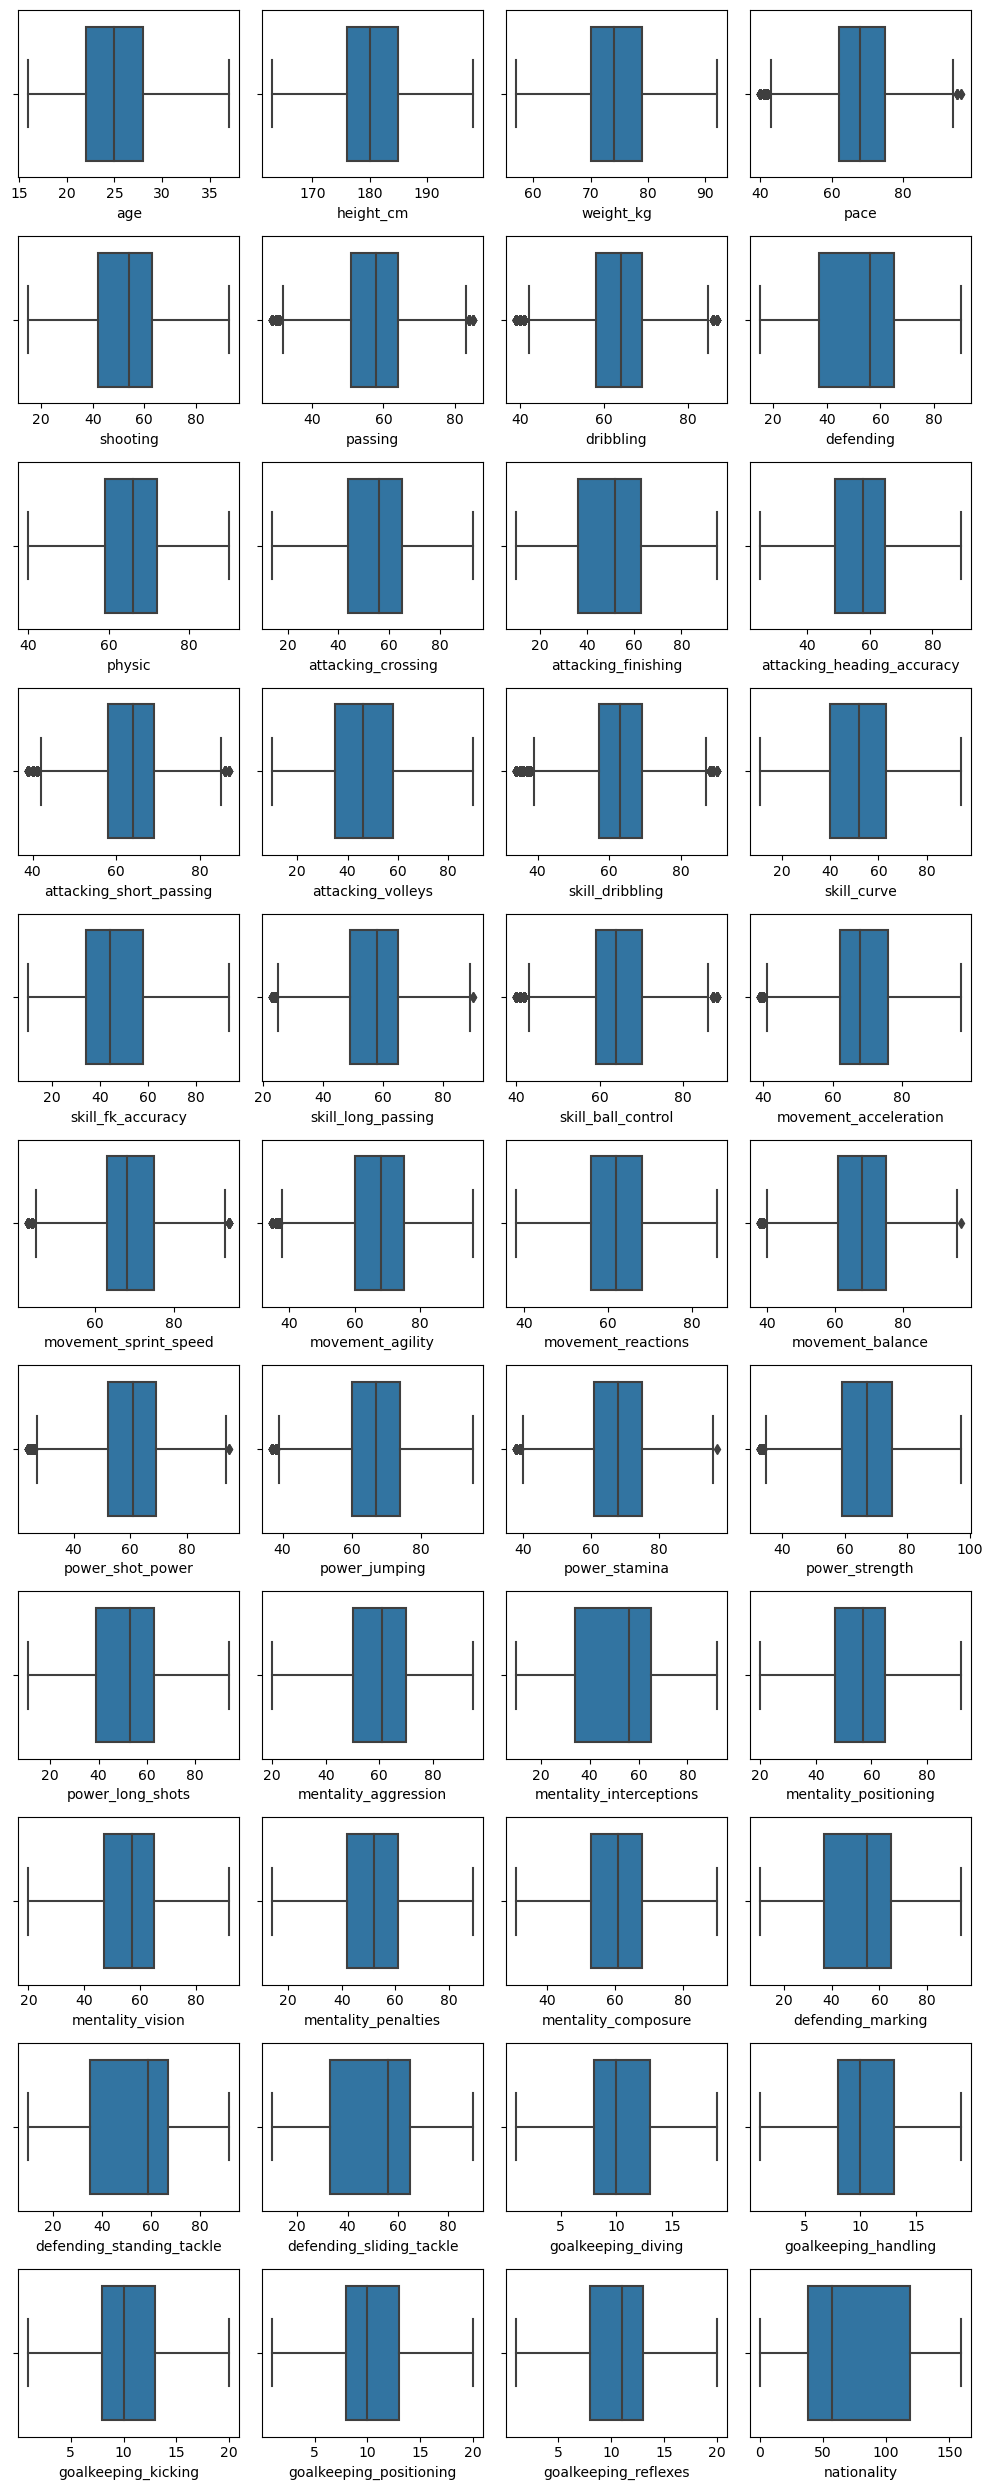

In [38]:
plt.figure(figsize=(10,25))
plotnumber = 1
for i in df.keys():
    plt.subplot(11,4,plotnumber)
    sns.boxplot(x=df[i])
    plotnumber = plotnumber + 1
plt.tight_layout()

## iv . Scaling Data :-

In [39]:
# create a list of columns present in dataframe df
df_columns = []
for i in df.keys():
    df_columns.append(i)

In [40]:
# Scale the data using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df,columns=df_columns)

In [41]:
df.tail()

age  height_cm  weight_kg      pace  shooting   passing  \
15072 -1.148402  -0.077505  -0.365858 -1.601070 -1.080673 -1.000265   
15073 -0.705900   0.866904   0.718758 -1.110993 -2.077732  0.071978   
15074 -0.705900  -0.549710  -1.295529 -1.012977 -2.006513 -2.364938   
15075 -1.369653   0.866904   0.098977 -1.405039 -1.223110 -1.292695   
15076 -1.590904   0.709503  -0.055968 -0.914962 -1.223110 -1.000265   

       dribbling  defending    physic  attacking_crossing  \
15072  -1.909195  -0.591674 -1.720282           -1.218697   
15073   0.083033  -0.286335 -1.507874           -2.355431   
15074   0.083033  -0.225267 -1.826487           -2.142293   
15075  -2.019875  -0.225267 -1.507874           -1.573927   
15076  -1.798516  -0.408471 -1.401669           -1.076606   

       attacking_finishing  attacking_heading_accuracy  \
15072            -0.900328                   -0.694401   
15073            -2.002770                   -1.476407   
15074            -1.819030                   -1.302628   
15075            -1.022822                   -0.694401   
15076            -0.961575                   -0.868180   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
15072                -0.949642          -1.328860        -2.076855   
15073                 0.088277          -1.328860         0.076845   
15074                -2.333535          -1.260972         0.076845   
15075                -1.180291          -0.989418        -2.174751   
15076                -1.064967          -1.260972        -1.978960   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
15072    -1.345325          -1.081794           -0.763331           -2.268330   
15073    -1.873342          -1.680414           -2.329921            0.012397   
15074    -1.807340          -1.148307           -1.422948            0.012397   
15075    -1.279322          -0.948767           -0.103715           -1.698148   
15076    -0.949311          -0.483174           -0.680879           -1.698148   

       movement_acceleration  movement_sprint_speed  movement_agility  \
15072              -1.373657              -1.906921         -0.361881   
15073              -1.183086              -1.093532         -1.950645   
15074              -1.278372              -0.788511         -2.127174   
15075              -1.278372              -1.500226         -1.332792   
15076              -1.278372              -0.585164         -1.067998   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
15072           -1.059650         -0.315610         -0.981331      -0.627048   
15073           -2.566252          0.512379         -1.826509       0.315336   
15074           -2.450359          0.788375         -2.057012       0.503813   
15075           -1.175543         -0.959601         -0.904497      -0.627048   
15076           -0.943758         -0.775603         -1.058165      -0.532809   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
15072      -1.593122       -1.759941         -1.266943             -0.531022   
15073      -0.734420       -1.594159         -2.215592             -0.951208   
15074      -1.211477       -1.842832         -1.962619             -1.231332   
15075      -1.688533       -1.262595         -1.583159             -0.671084   
15076      -2.451823       -0.931032         -1.456673             -0.180867   

       mentality_interceptions  mentality_positioning  mentality_vision  \
15072                -0.281887              -1.259906         -0.514261   
15073                -0.122214              -1.887373         -2.392306   
15074                -0.068990              -2.235966         -2.392306   
15075                -0.281887              -1.190187         -1.375031   
15076                -0.068990              -1.678217         -0.592513   

       mentality_penalties  mentality_composure  defending_marking  \
15072            -0.960372            -

# Feature Selection :-

In [42]:
# Check corelation of tha data
correlation_matrix=df.corr()
correlation_matrix

age  height_cm  weight_kg      pace  \
age                         1.000000   0.075991   0.224440 -0.126406   
height_cm                   0.075991   1.000000   0.730312 -0.394291   
weight_kg                   0.224440   0.730312   1.000000 -0.340315   
pace                       -0.126406  -0.394291  -0.340315  1.000000   
shooting                    0.242110  -0.203396  -0.098589  0.349715   
passing                     0.327519  -0.282544  -0.177453  0.284490   
dribbling                   0.153900  -0.367468  -0.264028  0.492682   
defending                   0.266595   0.220496   0.224607 -0.284962   
physic                      0.432476   0.470841   0.553740 -0.171276   
attacking_crossing          0.267574  -0.367170  -0.253092  0.427068   
attacking_finishing         0.161625  -0.211992  -0.128586  0.368287   
attacking_heading_accuracy  0.354833   0.520232   0.514929 -0.251446   
attacking_short_passing     0.298138  -0.140991  -0.061100  0.126224   
attacking_volleys           0.248027  -0.176353  -0.082550  0.302955   
skill_dribbling             0.125057  -0.313223  -0.230450  0.465081   
skill_curve                 0.261725  -0.303882  -0.197354  0.352863   
skill_fk_accuracy           0.303727  -0.262444  -0.156815  0.210303   
skill_long_passing          0.313667  -0.142646  -0.071298  0.053300   
skill_ball_control          0.245664  -0.206687  -0.114491  0.325856   
movement_acceleration      -0.128527  -0.449425  -0.384597  0.922238   
movement_sprint_speed      -0.083296  -0.315792  -0.267427  0.926052   
movement_agility            0.028338  -0.551695  -0.454879  0.651081   
movement_reactions          0.464735   0.020874   0.117408  0.128628   
movement_balance           -0.057409  -0.724794  -0.592011  0.471172   
power_shot_power            0.313523  -0.071703   0.041816  0.231142   
power_jumping               0.233261   0.098347   0.164858  0.010552   
power_stamina               0.280282  -0.044226   0.033151  0.242412   
power_strength              0.372826   0.630024   0.688662 -0.284031   
power_long_shots            0.284926  -0.213596  -0.101047  0.291836   
mentality_aggression        0.401369   0.255787   0.320423 -0.188007   
mentality_interceptions     0.284415   0.178467   0.188595 -0.261032   
mentality_positioning       0.209315  -0.281790  -0.186165  0.422794   
mentality_vision            0.245113  -0.281891  -0.196483  0.286055   
mentality_penalties         0.255319  -0.144779  -0.050991  0.203933   
mentality_composure         0.458667   0.015771   0.109683  0.118025   
defending_marking           0.256689   0.184775   0.195820 -0.248635   
defending_standing_tackle   0.209928   0.186518   0.184225 -0.278871   
defending_sliding_tackle    0.183472   0.160930   0.156464 -0.266024   
goalkeeping_diving          0.078838   0.005545   0.015792  0.009605   
goalkeeping_handling        0.085147   0.005150   0.026532 -0.000064   
goalkeeping_kicking         0.088661   0.010415   0.019869  0.013920   
goalkeeping_positioning     0.080557   0.009310   0.023992 -0.020557   
goalkeeping_reflexes        0.088031   0.005570   0.025428 -0.005668   
nationality                -0.035388  -0.004199  -0.036005 -0.020032   

                            shooting   passing  dribbling  defending  \
age                         0.242110  0.327519   0.153900   0.266595   
height_cm                  -0.203396 -0.282544  -0.367468   0.220496   
weight_kg                  -0.098589 -0.177453  -0.264028   0.224607   
pace                        0.349715  0.284490   0.492682  -0.284962   
shooting                    1.000000  0.646879   0.697469  -0.398227   
passing                     0.646879  1.000000   0.744754   0.162399   
dribbling                   0.697469  0.744754   1.000000  -0.142962   
defending                  -0.398227  0.162399  -0.142962   1.000000   
physic                      0.008308  0.131646  -0.036140   0.542533   
attacking_crossing          0.517952  0.823276   0.672662   0.093286   


In [43]:
# Identify  highly correlated Features


threshold=0.9                                                    # define a threshold point
columns_to_drop=[]                                               # create a empty list to store highly corelated features
n_cols=len(correlation_matrix.columns)                           # define the range 
for i in range(n_cols):                                          # use for loop to iterate over the range
    for j in range(i+1, n_cols):
        if (correlation_matrix.iloc[i, j])>threshold:            # give the condition if corelation > 0.9 then filterate
            col_i=correlation_matrix.columns[i]                   
            col_j=correlation_matrix.columns[j]
            # Check if any of the columns is not already marked to be dropped
            if col_i not in columns_to_drop:
                columns_to_drop.append(col_j)

In [44]:
# Print Feature's That are highly Corelated
print(columns_to_drop,end='  ')

['movement_acceleration', 'movement_sprint_speed', 'attacking_finishing', 'power_long_shots', 'skill_dribbling', 'mentality_interceptions', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']  

In [45]:
# Drop highly corelated features which corelation is > 0.9  .
df.drop(columns_to_drop,axis=1,inplace=True)

[]

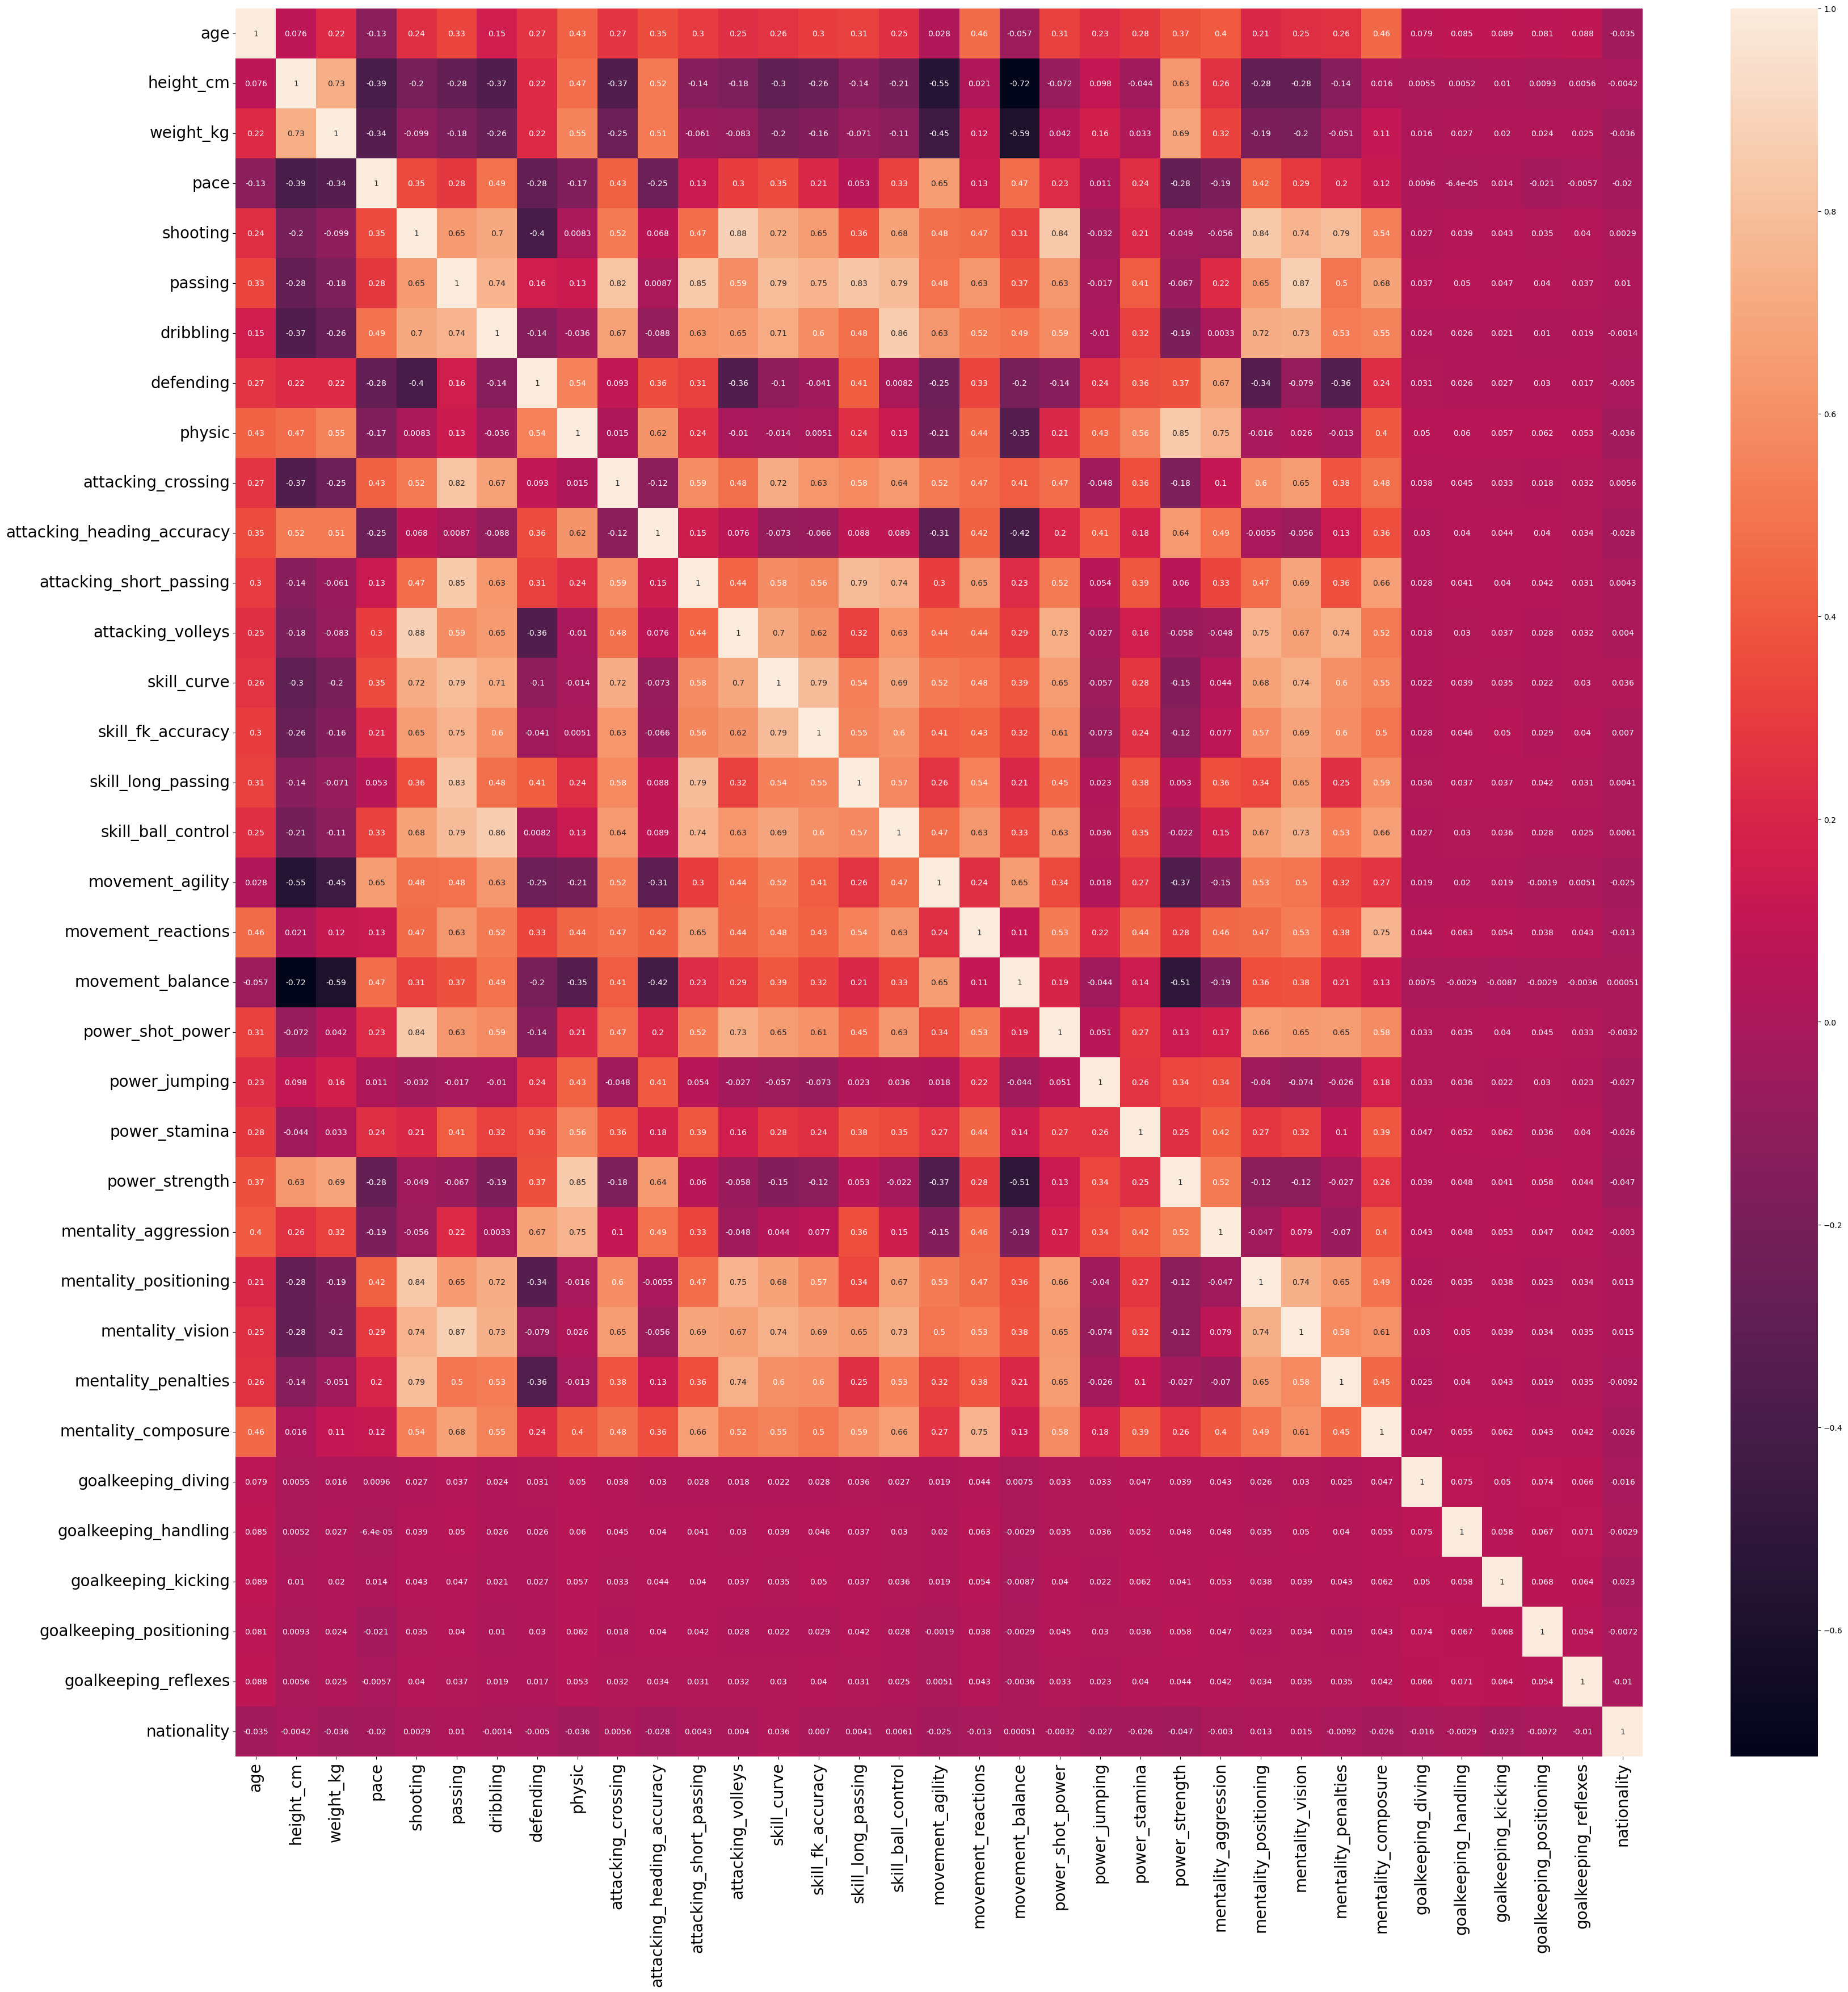

In [46]:
# Plot Coralation Plot Heatmap
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot()

In [47]:
# check duplicate values
df.duplicated().sum()

# there is no duplicated values

0

### Principal Component Analysis :-

In [48]:
# Feature Selection by PCA
from sklearn.decomposition import PCA                           # import PCA from decomposition module
pca = PCA()                                                     # Create a variable of PCA
principal_Components = pca.fit_transform(df)                    # Transform df using PCA
principal_Components = pd.DataFrame(principal_Components)       # Create a Data Frame of PCA Data

In [49]:
# Top five Rows of principal_Components
principal_Components.head()

0         1         2         3         4         5         6   \
0  5.775936 -1.745626  1.532373  2.171586 -0.610144  1.487114  1.666596   
1  7.056134  2.749837  2.300695  1.899965 -0.304795 -0.980162  1.959817   
2  7.009565 -2.564604  0.083682  0.489676 -0.999393  1.419184  1.354227   
3  6.682753 -2.086621  1.370093  1.230630  0.799090  1.005386 -1.570938   
4  6.029646  0.351079  1.261989  1.607582 -0.508123  0.513298 -2.382057   

         7         8         9         10        11        12        13  \
0 -1.247982  1.215321  1.667868  0.344087 -2.643555 -0.079093 -1.236424   
1 -0.757219  0.389503  0.517997 -0.340601 -1.256642 -1.193612 -2.989258   
2 -1.099684 -0.065138 -0.279929 -0.882960 -1.206721 -0.795951 -0.819330   
3  0.395557 -0.173138  0.763087  0.108967 -2.803891 -0.933853  0.220699   
4  1.057580 -0.030483 -0.312479 -0.534778 -2.910419 -1.257251  0.145552   

         14        15        16        17        18        19        20  \
0  2.110660 -0.218343  1.503977  0.269326  1.482125  0.511357 -1.148498   
1  0.261383 -0.377557  0.686683  2.649370  1.751022 -0.015765 -0.612131   
2  0.477737 -0.621222  0.165181  2.163730 -0.333668  0.650079 -0.755266   
3  0.985709 -0.002511  1.081244  1.863306  0.946801  1.158652  0.504775   
4  1.401786 -1.234980 -0.542129 -1.507933  0.405402 -0.003940 -0.393067   

         21        22        23        24        25        26        27  \
0 -0.112477  1.217020 -0.031983  0.247438  1.035657 -0.155332 -0.284694   
1 -1.538811 -0.107947  0.382887  0.435186  0.810243  0.425100 -0.189581   
2 -1.261128  0.823208 -0.433072  1.745393  0.910337 -0.585311 -1.021136   
3 -1.309057 -0.084997  0.073696  0.473123 -0.025394  0.176930  0.567867   
4 -0.279076  0.767464  0.469744 -0.470744  0.237816  0.968302 -0.517277   

         28        29        30        31        32        33        34  
0 -0.152224  0.300723 -0.337375 -0.312152 -0.860243 -0.257716  1.010871  
1  0.395341  1.395867 -1.168373  0.138623 -0.443106 -0.040668  0.025097  
2  0.507279  0.203686 -0.555500 -0.088394 -0.147812  0.011485  2.468178  
3 -0.308787 -0.278815  0.372356 -0.543359  0.298693  0.084780  1.754090  
4 -0.522470 -1.094957  0.491763  1.530140 -0.203613 -0.054565  0.925029

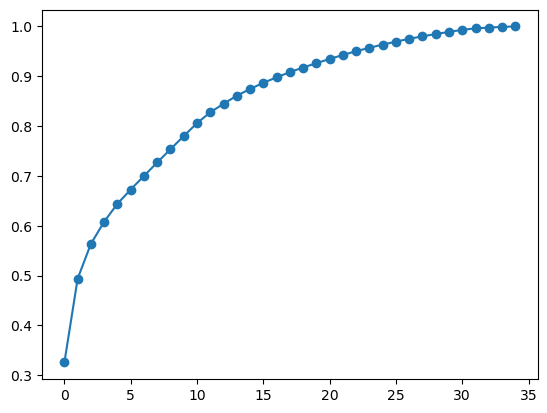

In [50]:
# plot the Variance Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')

In [51]:
# Take First 3 Principal components
PCA_DATA = principal_Components.iloc[:,:3]

<Axes: >

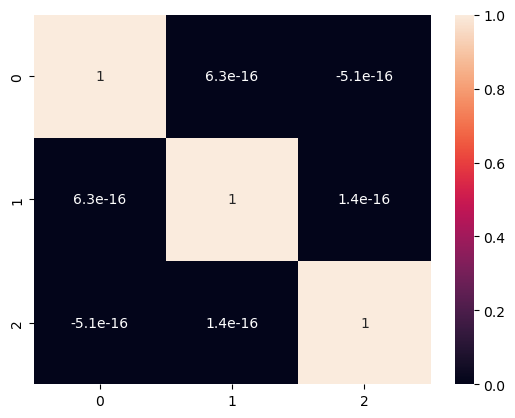

In [52]:
# Plot Corelation map of 3 principal component
sns.heatmap(PCA_DATA.corr(),annot=True)

### Elbow Technique For Number of Clusters :-

In [53]:
# find Number of Clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    k_means = KMeans(n_clusters=i)
    k_means.fit(PCA_DATA) 
    wcss.append(k_means.inertia_)

Text(0, 0.5, 'WCSS')

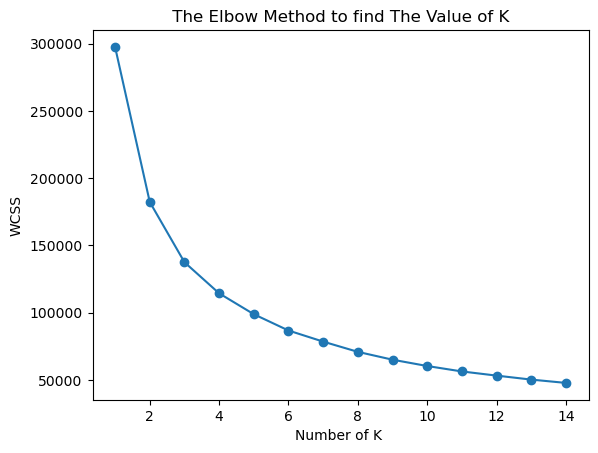

In [54]:
# Plot Wcss and no.of clusters map to find elbow point
plt.plot(range(1, 15), wcss,marker='o')
plt.title(" The Elbow Method to find The Value of K ")
plt.xlabel('Number of K ')
plt.ylabel("WCSS")

### Insights:-
- From above plot we can see that the elbow point is for 3 clusters

In [55]:
# Cluster data 
from sklearn.cluster import KMeans               # import KMeans from clustering
model = KMeans(n_clusters=3,random_state=99)     # make a object of KMeans with n_cluster=3
model.fit(PCA_DATA)                              # Fit or Train model on data
Labels = model.labels_                           # print labels
Labels

array([2, 2, 2, ..., 1, 0, 0])

In [56]:
# Check Performance of Model
from sklearn.metrics import silhouette_score
silhouette_score(PCA_DATA,Labels)

0.3110070786897037

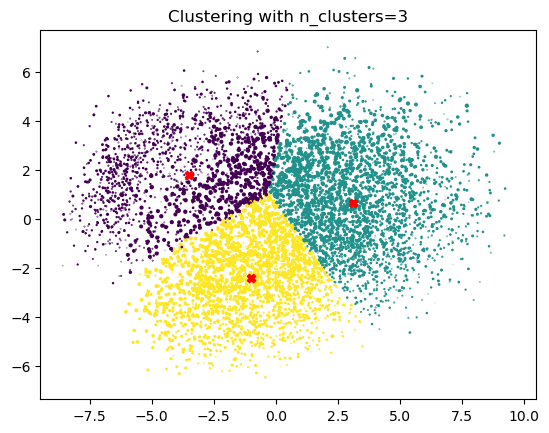

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your data stored in the variable `data`

# Perform K-means clustering with n_clusters=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(PCA_DATA)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(PCA_DATA.iloc[:, 0], PCA_DATA.iloc[:, 1],PCA_DATA.iloc[:, 2], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red',label='Centroids')
plt.title('Clustering with n_clusters=3')
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------